In [2]:
import pandas as pd
import holidays
import glob
import os

# === Train 데이터 불러오기 ===
train_path = './data/train/train.csv'
df_train = pd.read_csv(train_path)

# 컬럼명 영어로 변경
df_train.columns = ['date', 'store_menu', 'sales_qty']

# 업장명 / 메뉴명 분리
df_train[['store', 'menu']] = df_train['store_menu'].str.split('_', n=1, expand=True)

# 날짜 처리
df_train['date'] = pd.to_datetime(df_train['date'])

# 한국 공휴일 데이터 생성
kr_holidays = holidays.KR(years=range(df_train['date'].dt.year.min(),
                                      df_train['date'].dt.year.max() + 1))
holiday_dates = set(pd.to_datetime(list(kr_holidays.keys())).date)

# 공휴일 여부 추가
df_train['is_holiday'] = df_train['date'].dt.date.isin(holiday_dates)

# === Test 데이터 불러오기 ===
test_files = sorted(glob.glob('./data/test/TEST_*.csv'))

test_dfs = {}
for path in test_files:
    filename = os.path.basename(path)
    df_test = pd.read_csv(path)
    df_test.columns = ['date', 'store_menu', 'sales_qty']
    df_test[['store', 'menu']] = df_test['store_menu'].str.split('_', n=1, expand=True)
    df_test['date'] = pd.to_datetime(df_test['date'])
    test_dfs[filename] = df_test


In [3]:
# 각 TEST_n 시작일, 종료일 출력
for filename, df_test in test_dfs.items():
    start_date = df_test['date'].min()
    end_date = df_test['date'].max()
    print(f"{filename}: {start_date.date()} ~ {end_date.date()}")

TEST_00.csv: 2024-06-16 ~ 2024-07-13
TEST_01.csv: 2024-07-21 ~ 2024-08-17
TEST_02.csv: 2024-08-25 ~ 2024-09-21
TEST_03.csv: 2024-09-29 ~ 2024-10-26
TEST_04.csv: 2024-11-03 ~ 2024-11-30
TEST_05.csv: 2024-12-08 ~ 2025-01-04
TEST_06.csv: 2025-01-12 ~ 2025-02-08
TEST_07.csv: 2025-02-16 ~ 2025-03-15
TEST_08.csv: 2025-03-23 ~ 2025-04-19
TEST_09.csv: 2025-04-27 ~ 2025-05-24



[Menu: 느티나무 셀프BBQ_BBQ55(단체)] 10일 이상 연속 0 구간:
  구간 1: 2023-12-23 ~ 2024-03-13 (82일 연속 0)


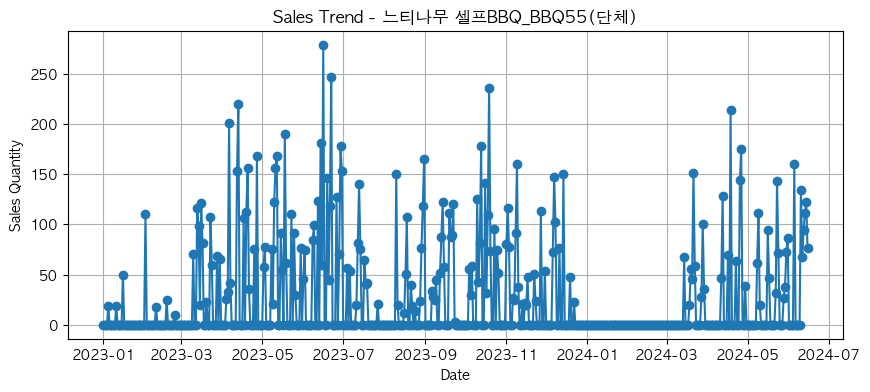


[Menu: 느티나무 셀프BBQ_본삼겹 (단품,실내)] 10일 이상 연속 0 구간:
  구간 1: 2023-02-26 ~ 2023-03-31 (34일 연속 0)
  구간 2: 2023-06-06 ~ 2023-07-19 (44일 연속 0)


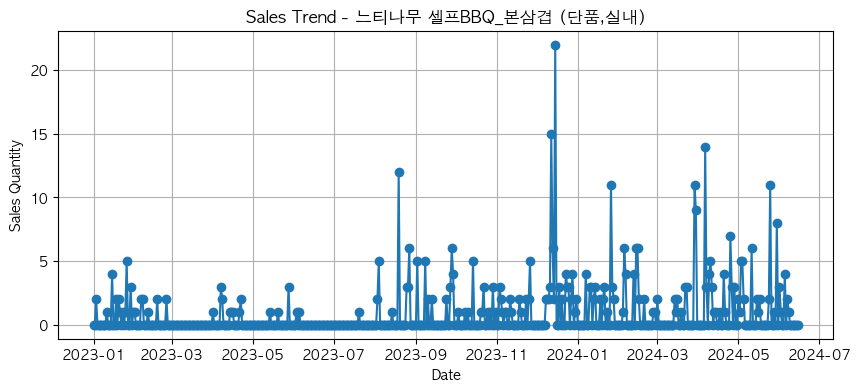


[Menu: 느티나무 셀프BBQ_신라면] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-13 (103일 연속 0)
  구간 2: 2023-10-30 ~ 2024-04-18 (172일 연속 0)


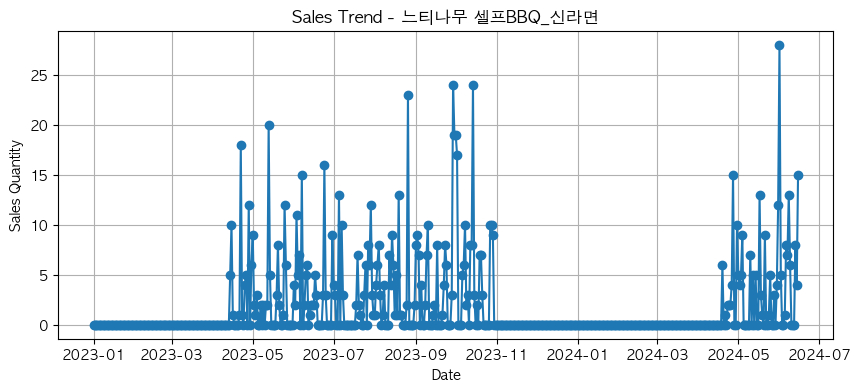


[Menu: 느티나무 셀프BBQ_쌈장] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-13 (103일 연속 0)


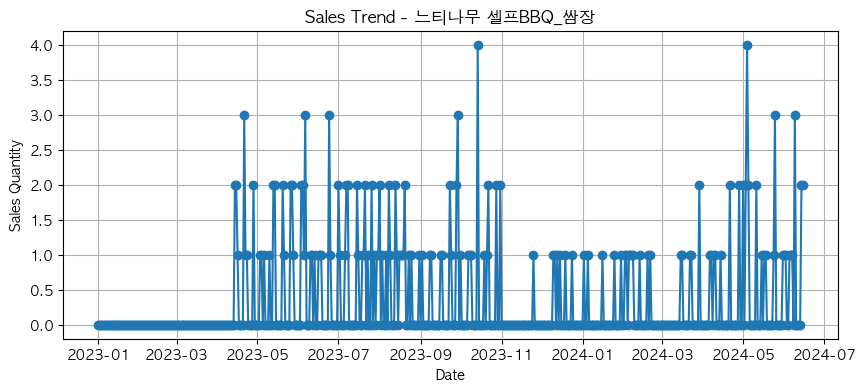


[Menu: 느티나무 셀프BBQ_육개장 사발면] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-13 (103일 연속 0)


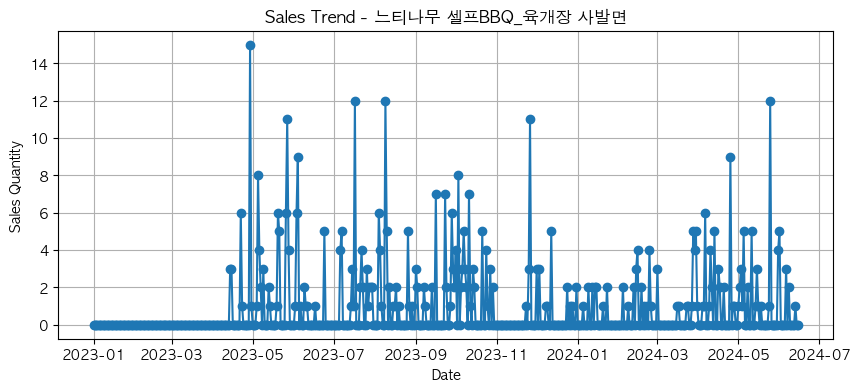


[Menu: 느티나무 셀프BBQ_일회용 소주컵] 10일 이상 연속 0 구간:
  구간 1: 2024-02-09 ~ 2024-03-22 (43일 연속 0)


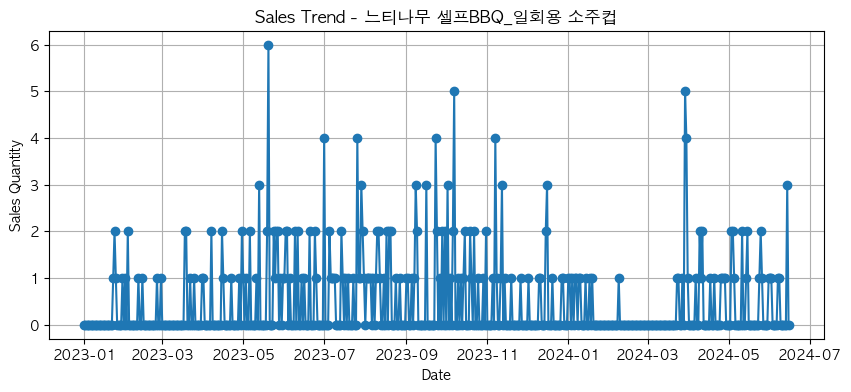


[Menu: 느티나무 셀프BBQ_일회용 종이컵] 10일 이상 연속 0 구간:
  구간 1: 2024-01-31 ~ 2024-03-22 (52일 연속 0)


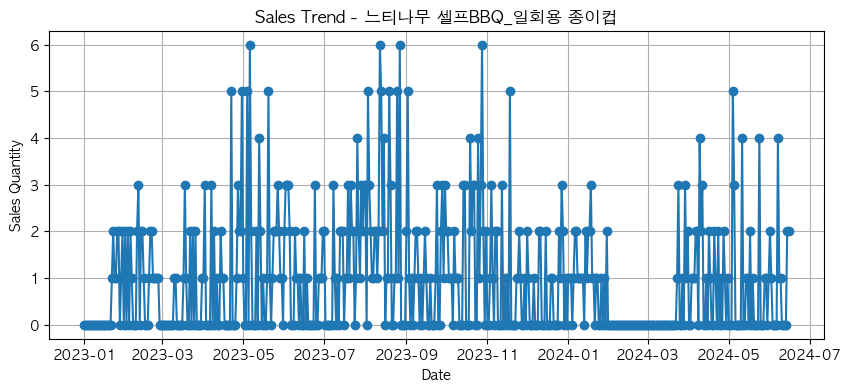


[Menu: 느티나무 셀프BBQ_잔디그늘집 대여료 (12인석)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-13 (103일 연속 0)
  구간 2: 2023-10-30 ~ 2024-04-18 (172일 연속 0)


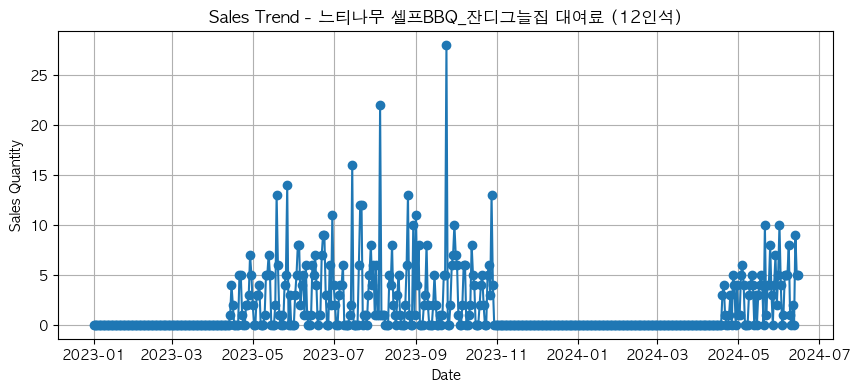


[Menu: 느티나무 셀프BBQ_잔디그늘집 대여료 (6인석)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-06 ~ 2023-03-09 (63일 연속 0)
  구간 2: 2023-03-11 ~ 2023-04-13 (34일 연속 0)
  구간 3: 2023-11-15 ~ 2024-04-18 (156일 연속 0)


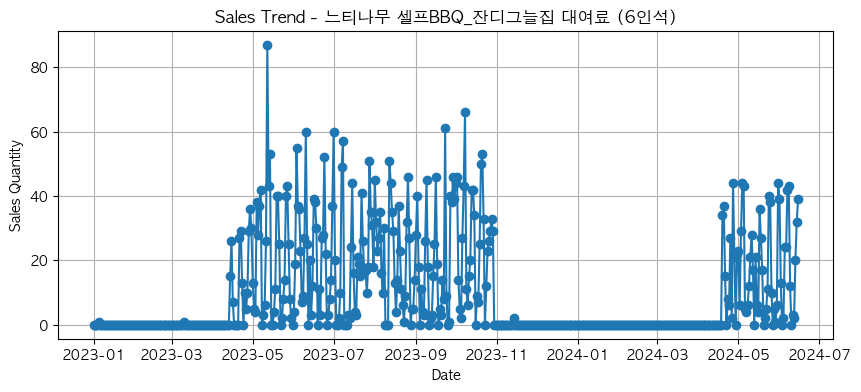


[Menu: 느티나무 셀프BBQ_잔디그늘집 의자 추가] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-13 (103일 연속 0)
  구간 2: 2023-10-29 ~ 2024-04-18 (173일 연속 0)


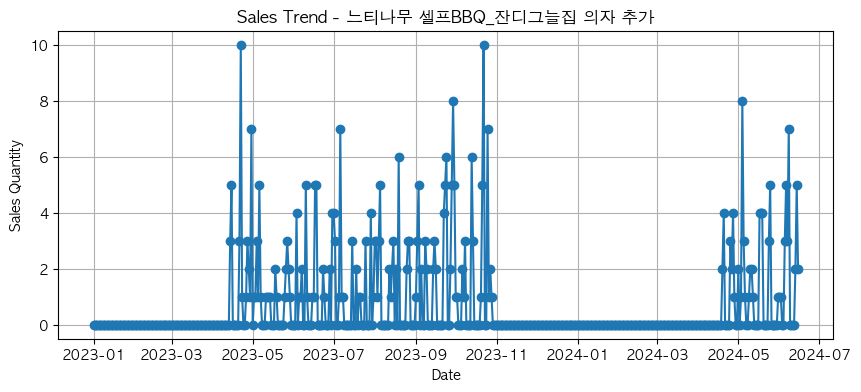


[Menu: 느티나무 셀프BBQ_햇반] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-13 (103일 연속 0)


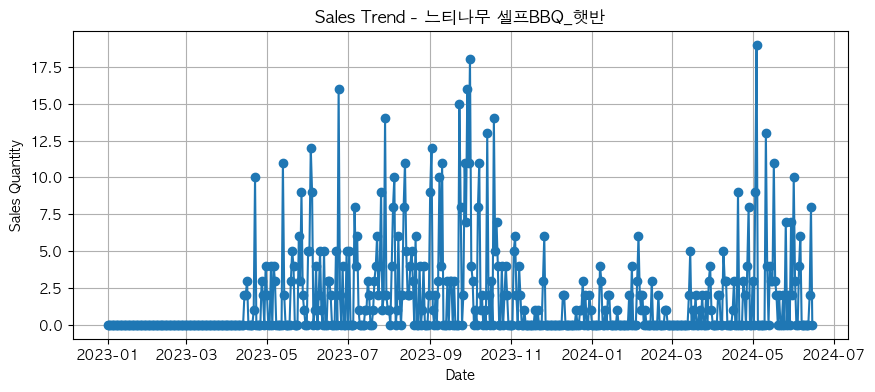


[Menu: 느티나무 셀프BBQ_허브솔트] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-13 (103일 연속 0)


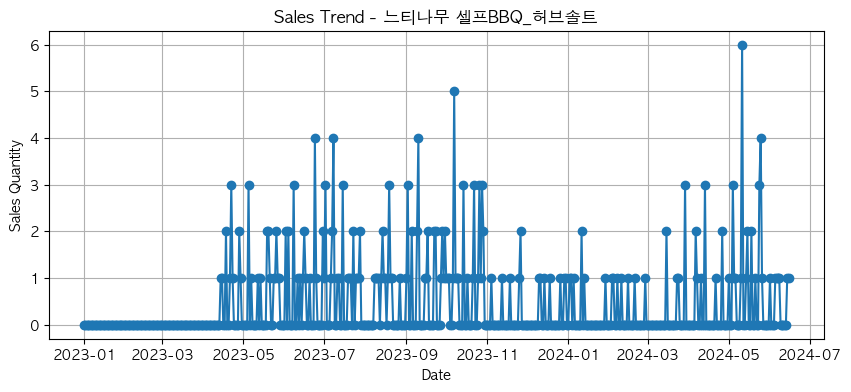


[Menu: 담하_(단체) 공깃밥] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-12 (71일 연속 0)
  구간 2: 2023-04-28 ~ 2023-05-30 (33일 연속 0)


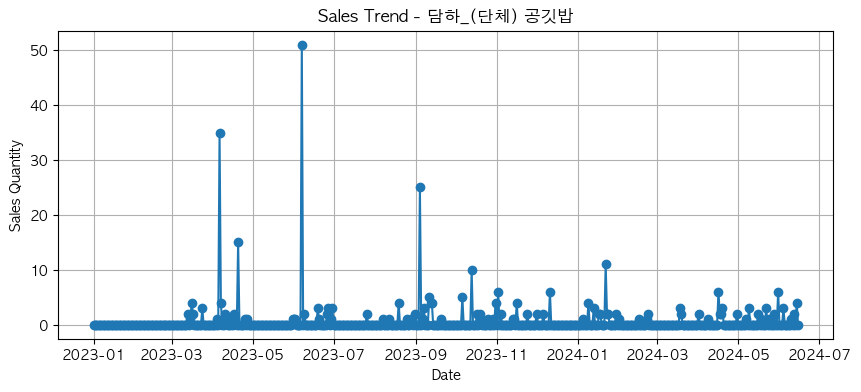


[Menu: 담하_(단체) 생목살 김치전골 2.0] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-17 (260일 연속 0)


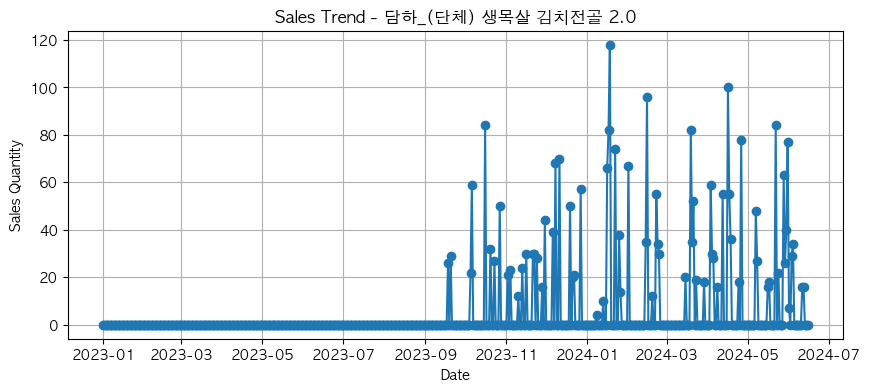


[Menu: 담하_(단체) 은이버섯 갈비탕] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-11 (162일 연속 0)


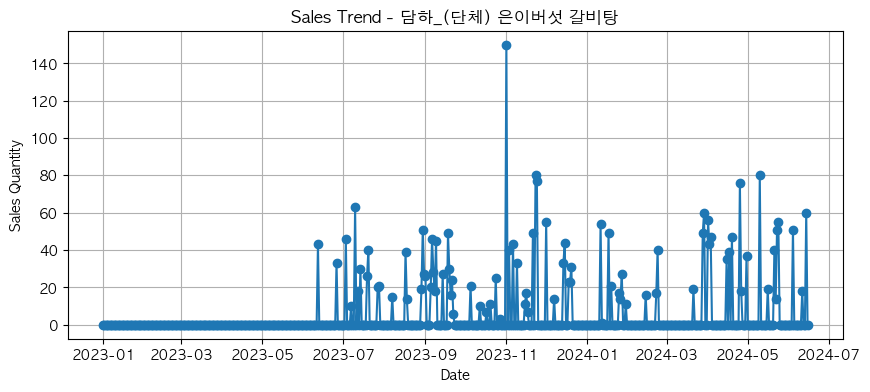


[Menu: 담하_(정식) 된장찌개] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-02 (153일 연속 0)


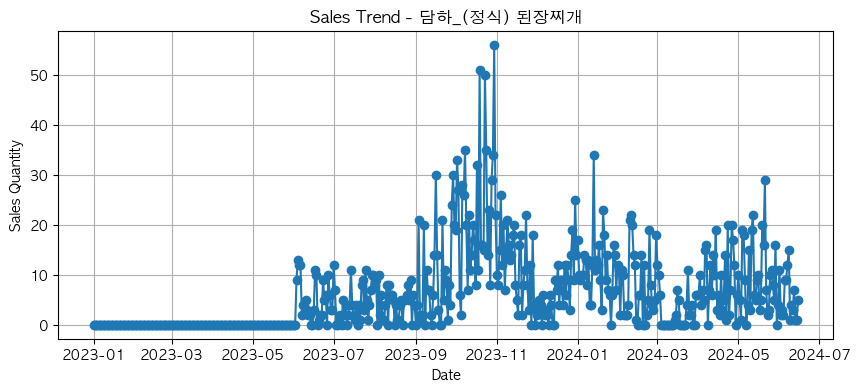


[Menu: 담하_(정식) 물냉면 ] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-02 (153일 연속 0)


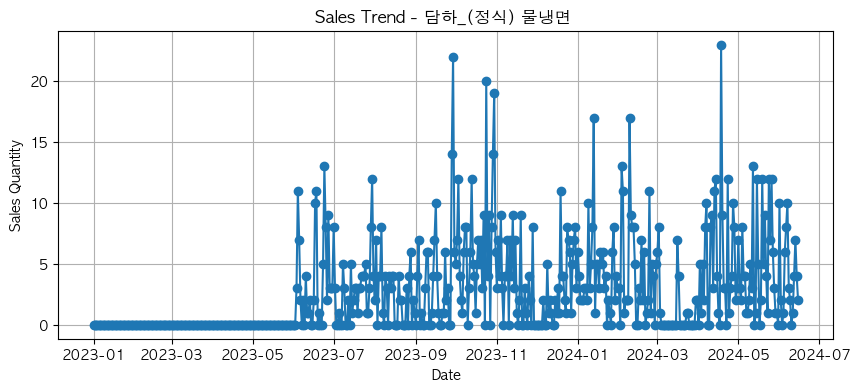


[Menu: 담하_(정식) 비빔냉면] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-02 (153일 연속 0)


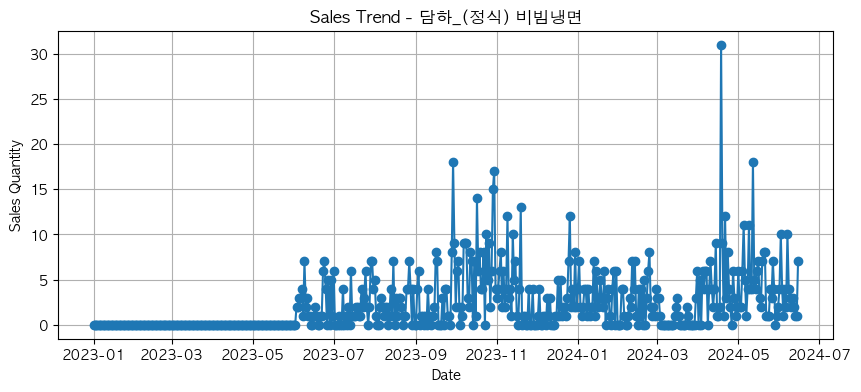


[Menu: 담하_(후식) 물냉면] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-01 (152일 연속 0)


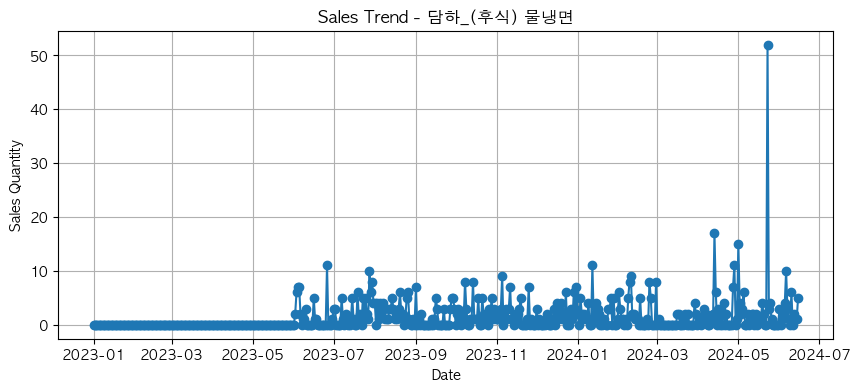


[Menu: 담하_(후식) 비빔냉면] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-01 (152일 연속 0)


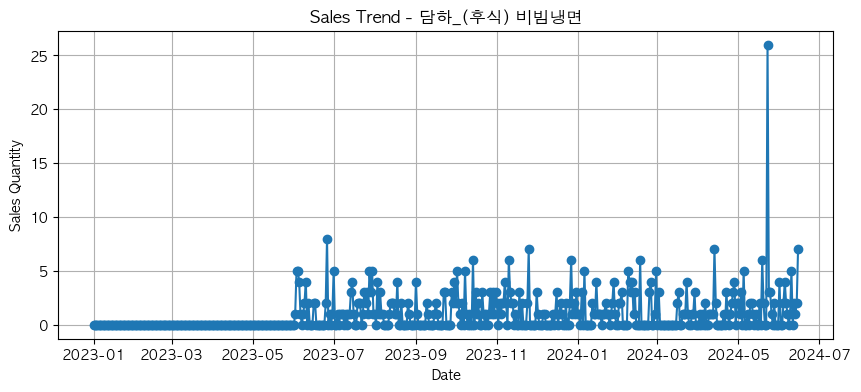


[Menu: 담하_갑오징어 비빔밥] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-16 (75일 연속 0)
  구간 2: 2023-09-08 ~ 2024-03-29 (204일 연속 0)


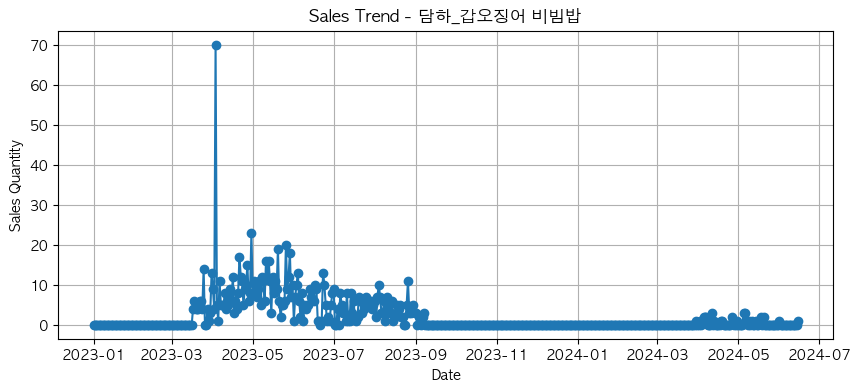


[Menu: 담하_갱시기] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-12-07 (341일 연속 0)


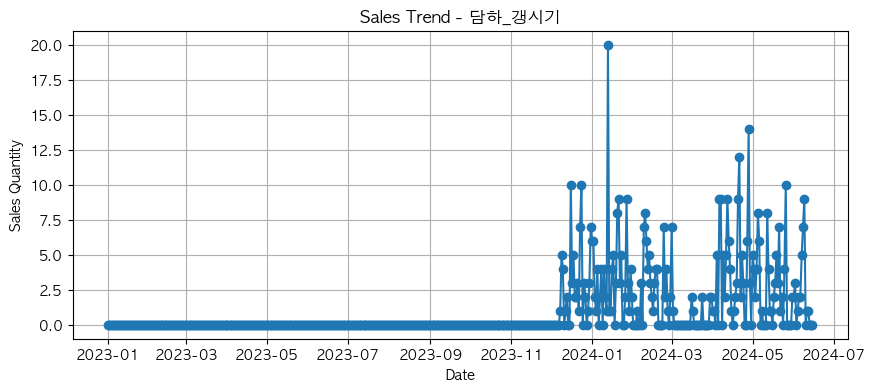


[Menu: 담하_꼬막 비빔밥] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-07 (250일 연속 0)
  구간 2: 2024-03-29 ~ 2024-06-15 (79일 연속 0)


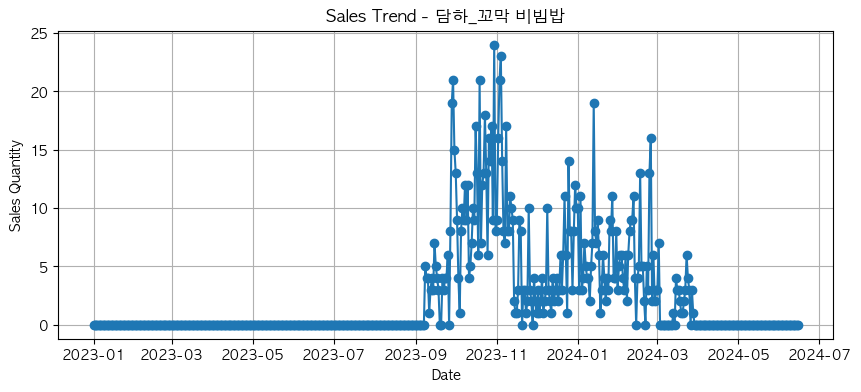


[Menu: 담하_담하 한우 불고기 정식] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-01 (152일 연속 0)


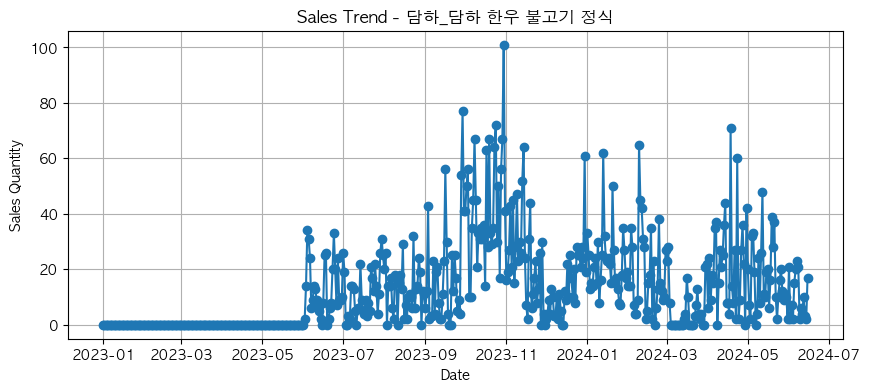


[Menu: 담하_더덕 한우 지짐] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-08 (251일 연속 0)


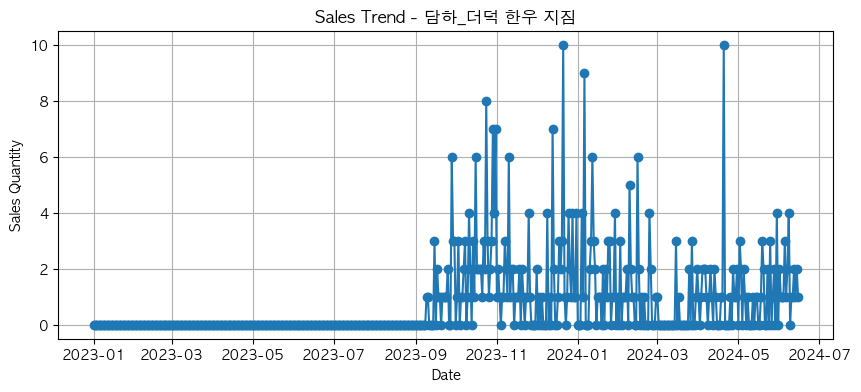


[Menu: 담하_들깨 양지탕] 10일 이상 연속 0 구간:
  구간 1: 2024-03-29 ~ 2024-06-15 (79일 연속 0)


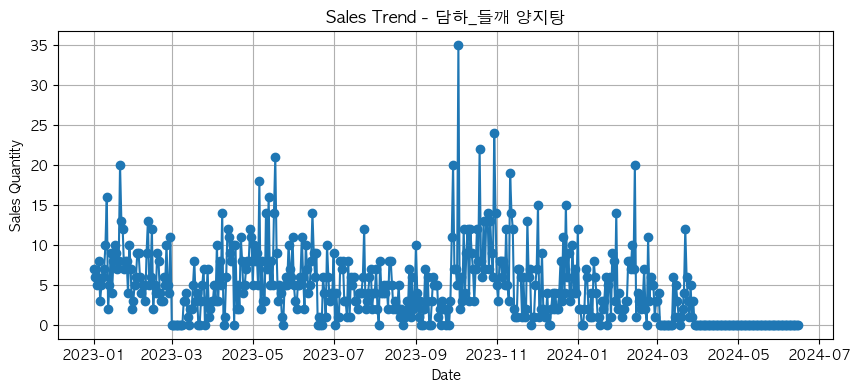


[Menu: 담하_라면사리] 10일 이상 연속 0 구간:
  구간 1: 2023-04-06 ~ 2023-05-13 (38일 연속 0)


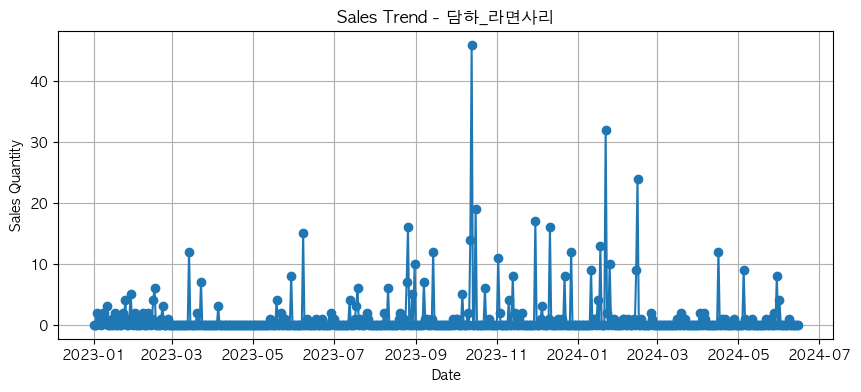


[Menu: 담하_명인안동소주] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-30 (181일 연속 0)


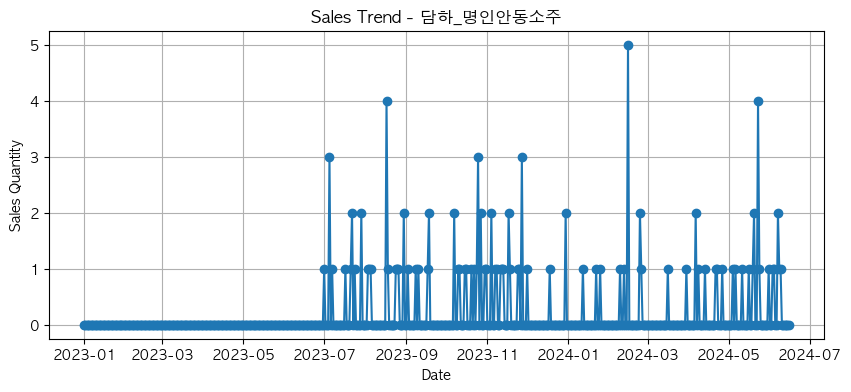


[Menu: 담하_명태회 비빔냉면] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-01 (152일 연속 0)


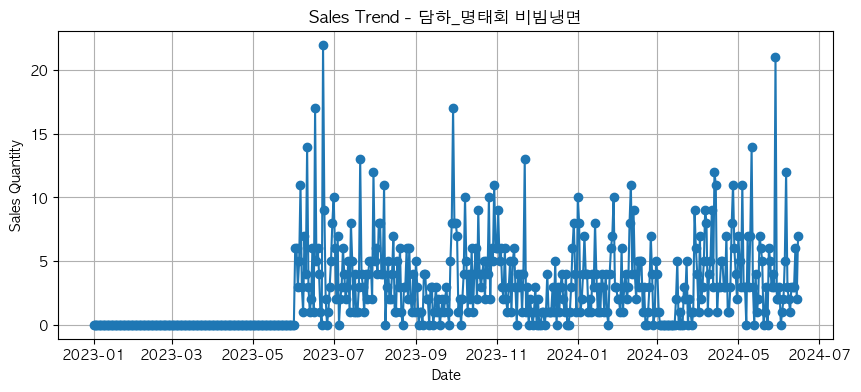


[Menu: 담하_문막 복분자 칵테일] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-11 (254일 연속 0)


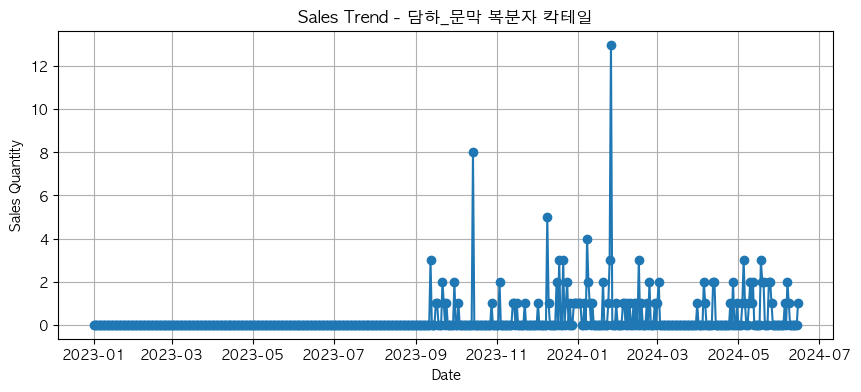


[Menu: 담하_봉평메밀 물냉면] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-01 (152일 연속 0)


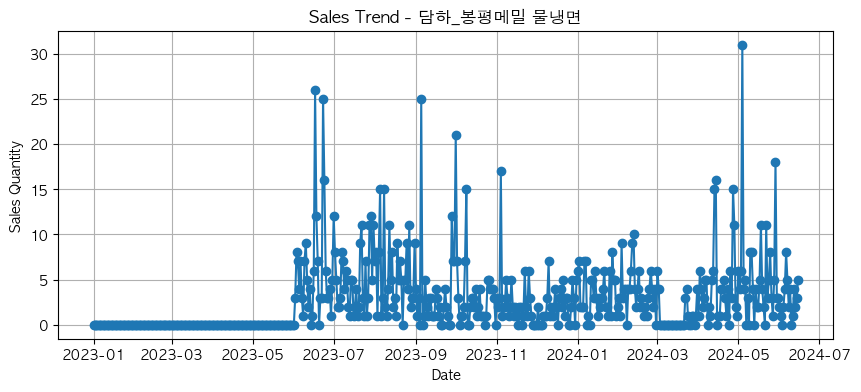


[Menu: 담하_하동 매실 칵테일] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-17 (76일 연속 0)


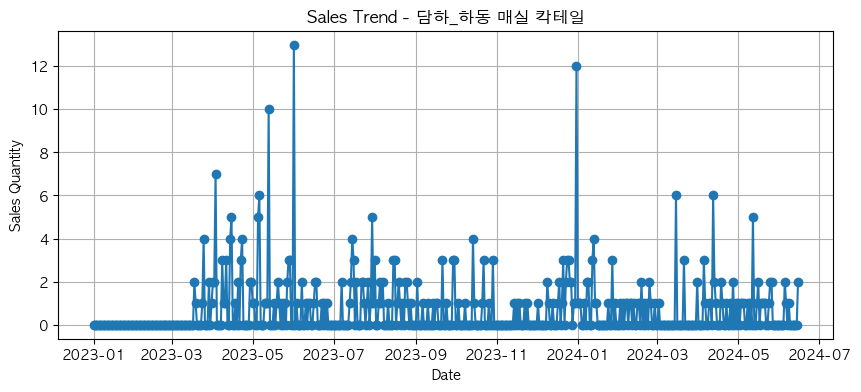


[Menu: 라그로타_AUS (200g)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-12-07 (341일 연속 0)


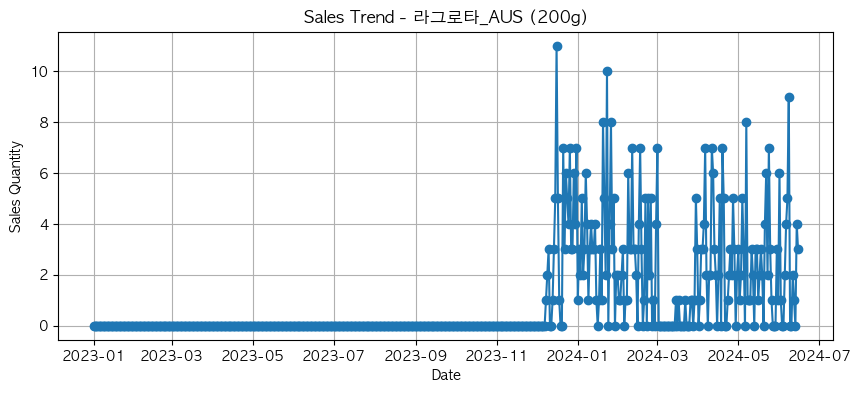


[Menu: 라그로타_Open Food] 10일 이상 연속 0 구간:
  구간 1: 2023-06-03 ~ 2023-07-05 (33일 연속 0)
  구간 2: 2023-08-23 ~ 2023-09-25 (34일 연속 0)


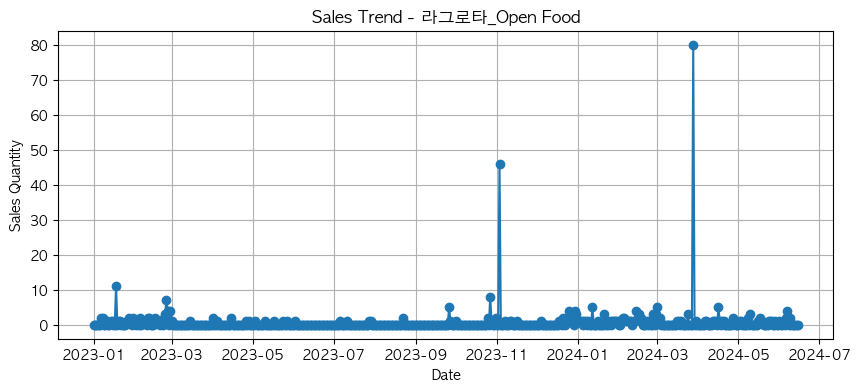


[Menu: 라그로타_그릴드 비프 샐러드] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-07 (250일 연속 0)


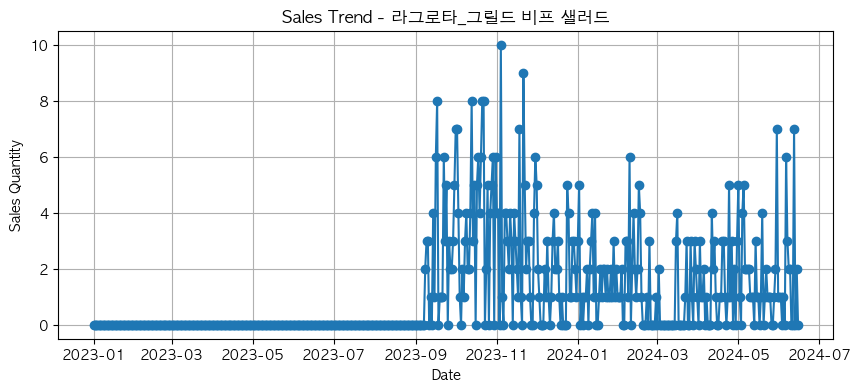


[Menu: 라그로타_까르보나라] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-12-07 (341일 연속 0)


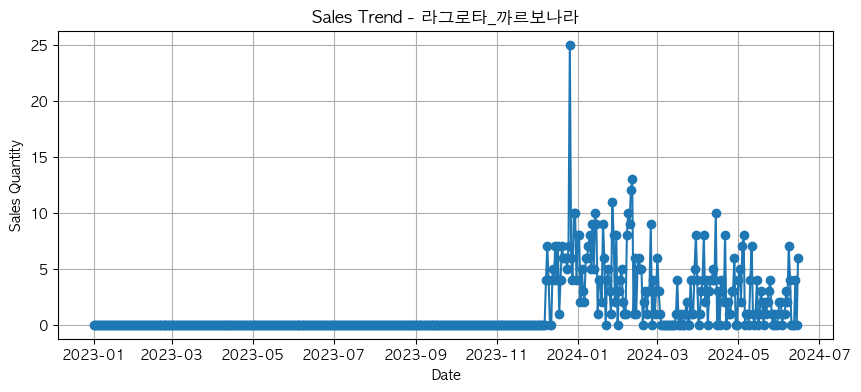


[Menu: 라그로타_모둠 해산물 플래터] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-08 (251일 연속 0)
  구간 2: 2024-02-28 ~ 2024-03-28 (30일 연속 0)


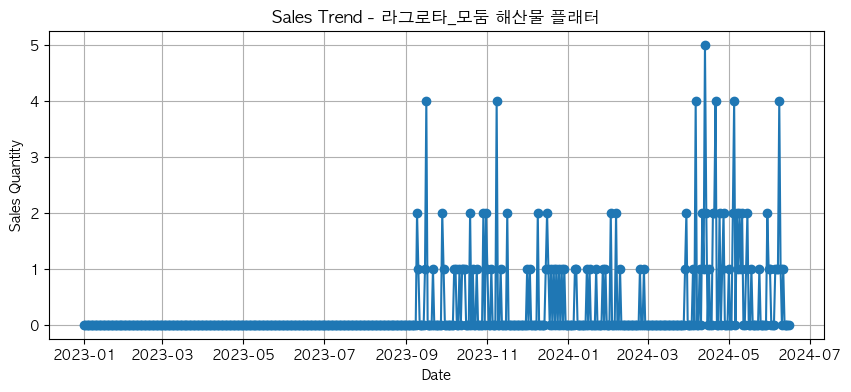


[Menu: 라그로타_버섯 크림 리조또] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-12-07 (341일 연속 0)


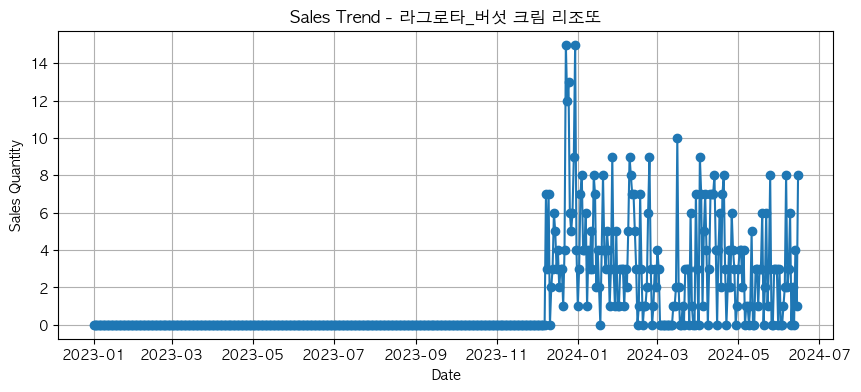


[Menu: 라그로타_시저 샐러드 ] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-07 (250일 연속 0)


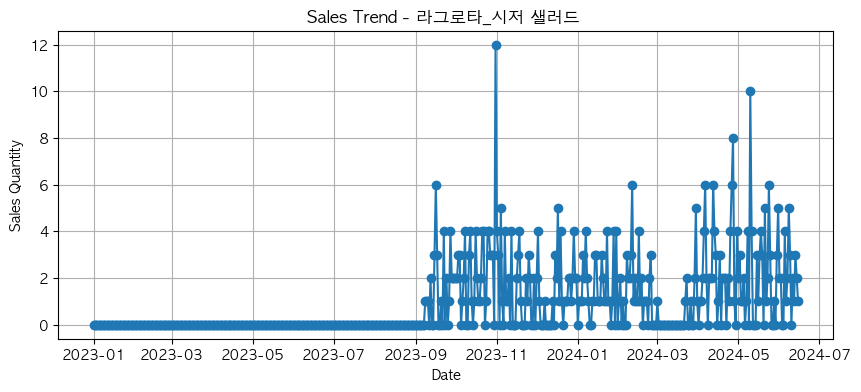


[Menu: 라그로타_알리오 에 올리오 ] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-07 (250일 연속 0)


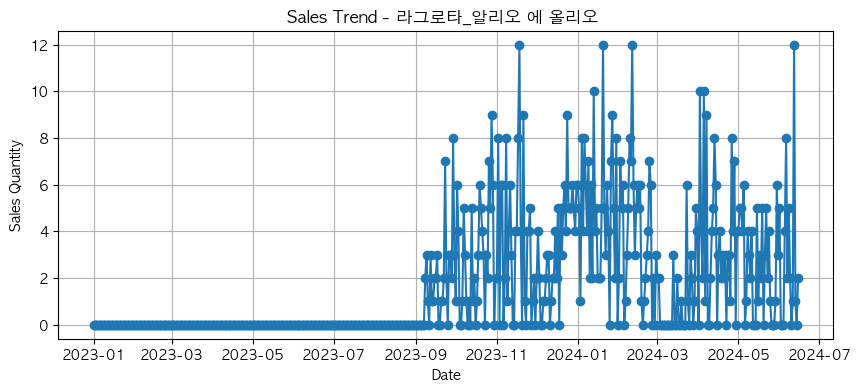


[Menu: 라그로타_양갈비 (4ps)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-09 (252일 연속 0)
  구간 2: 2023-11-05 ~ 2023-12-08 (34일 연속 0)


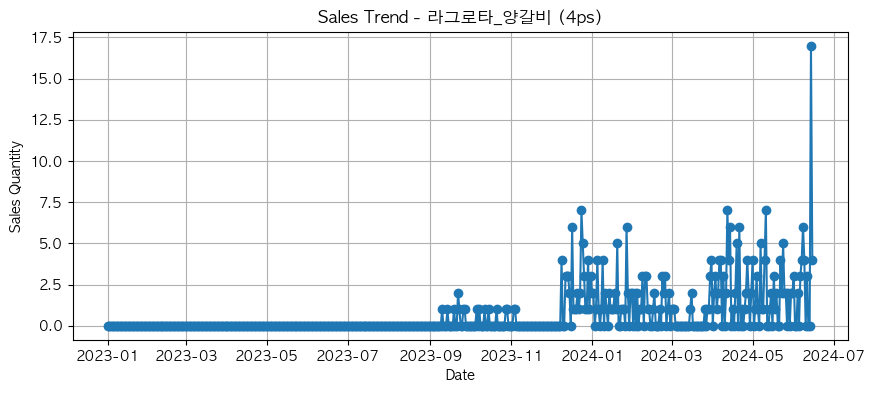


[Menu: 라그로타_한우 (200g)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-12-08 (342일 연속 0)


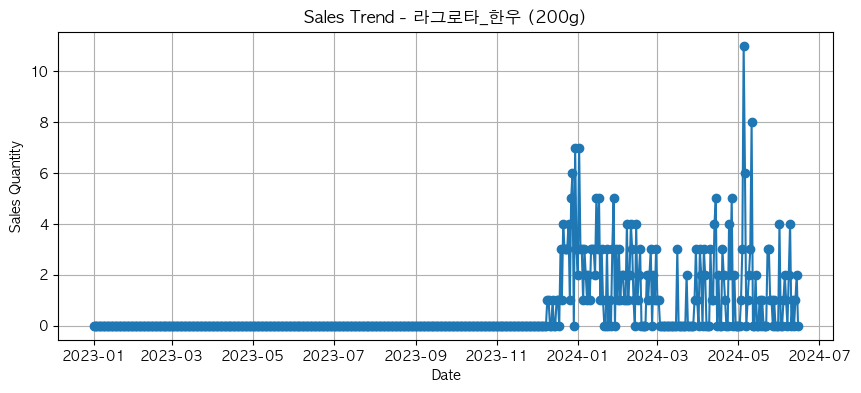


[Menu: 라그로타_해산물 토마토 리조또] 10일 이상 연속 0 구간:
  구간 1: 2024-03-29 ~ 2024-06-14 (78일 연속 0)


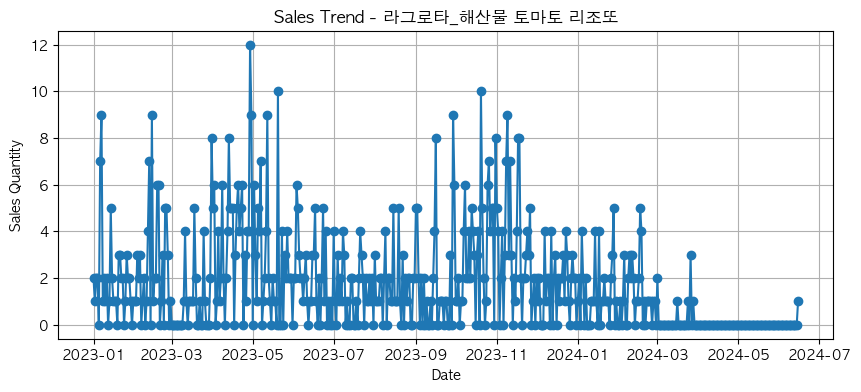


[Menu: 라그로타_해산물 토마토 스튜 파스타] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-12-07 (341일 연속 0)


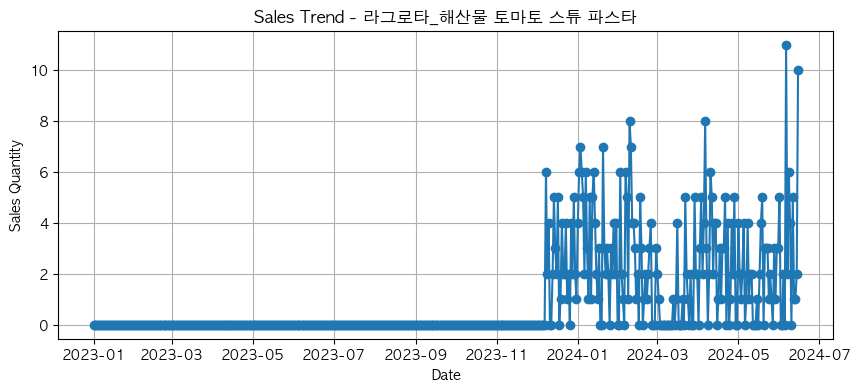


[Menu: 미라시아_(오븐) 하와이안 쉬림프 피자] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-08 (251일 연속 0)


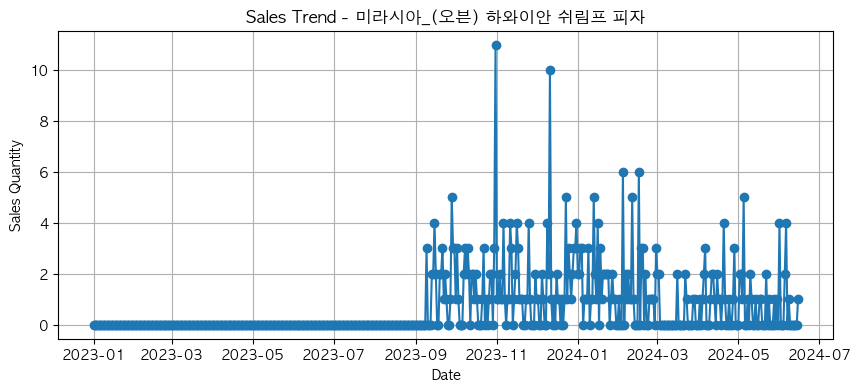


[Menu: 미라시아_공깃밥] 10일 이상 연속 0 구간:
  구간 1: 2023-03-19 ~ 2024-01-24 (312일 연속 0)


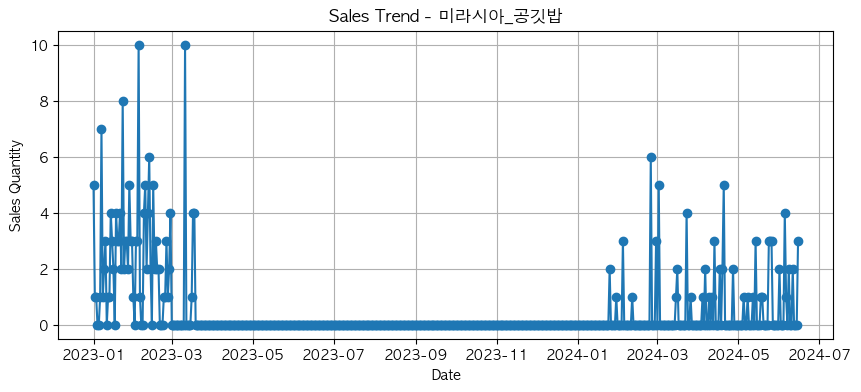


[Menu: 미라시아_글라스와인 (레드)] 10일 이상 연속 0 구간:
  구간 1: 2023-04-29 ~ 2023-06-08 (41일 연속 0)


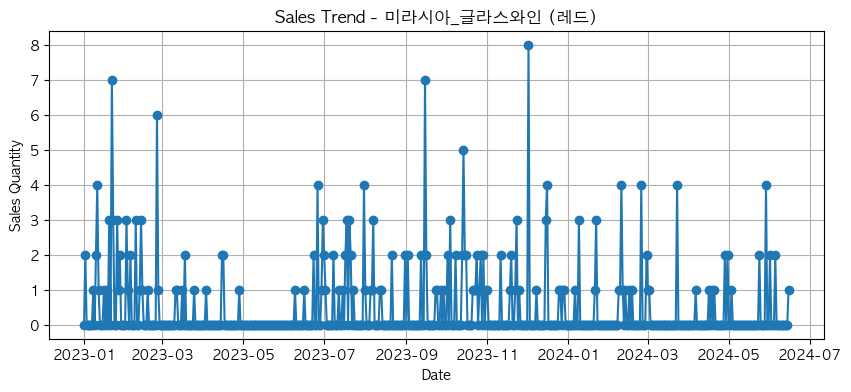


[Menu: 미라시아_버드와이저(무제한)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-20 (110일 연속 0)


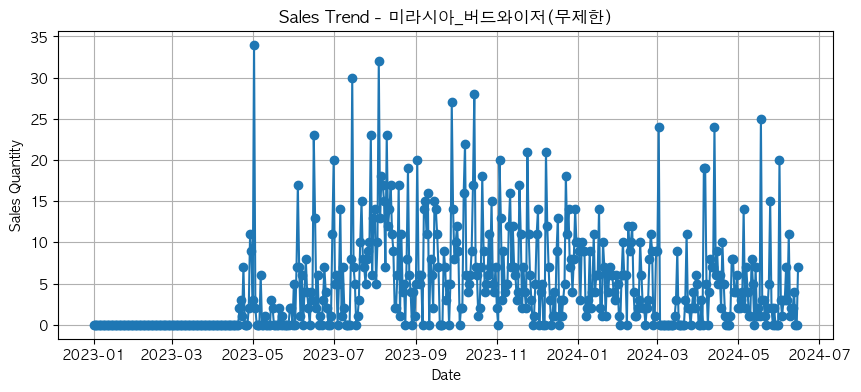


[Menu: 미라시아_보일링 랍스타 플래터] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-04 (155일 연속 0)


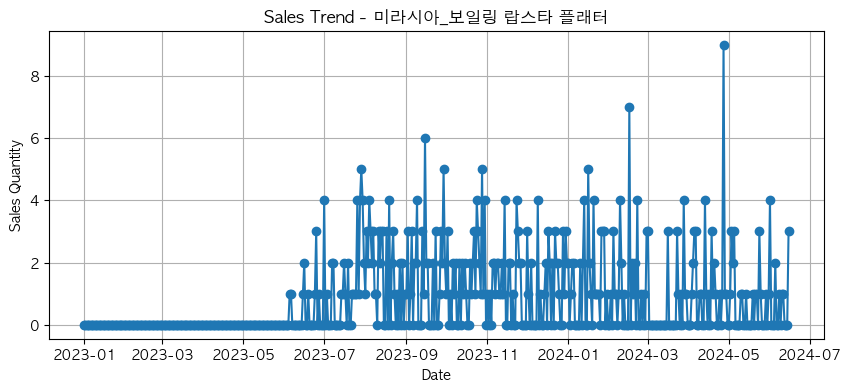


[Menu: 미라시아_보일링 랍스타 플래터(덜매운맛)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-02 (153일 연속 0)


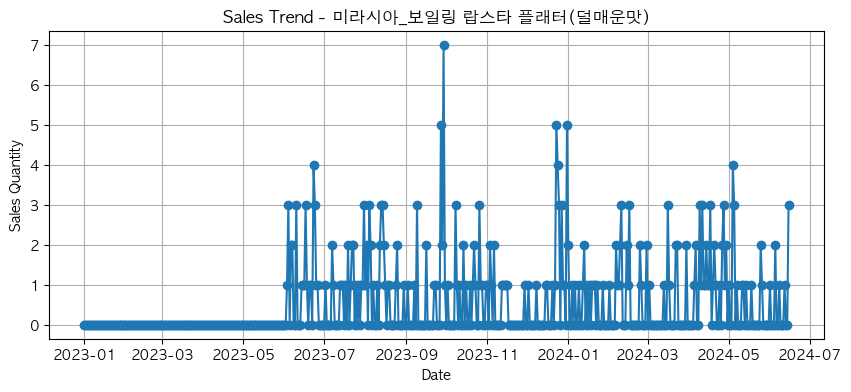


[Menu: 미라시아_브런치 4인 패키지 ] 10일 이상 연속 0 구간:
  구간 1: 2024-02-24 ~ 2024-04-10 (47일 연속 0)


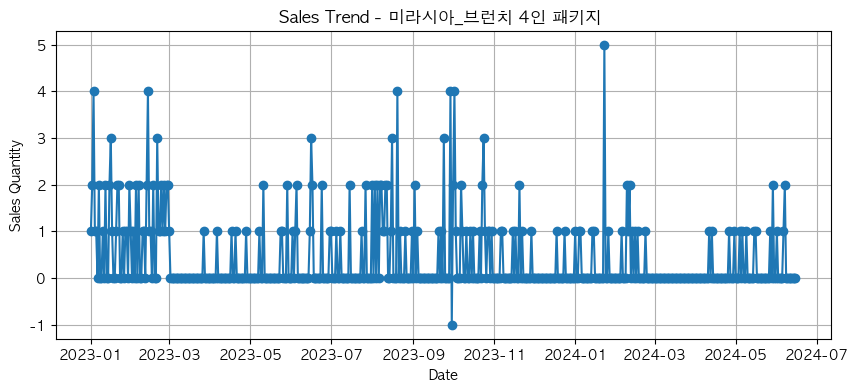


[Menu: 미라시아_쉬림프 투움바 파스타] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-02 (153일 연속 0)


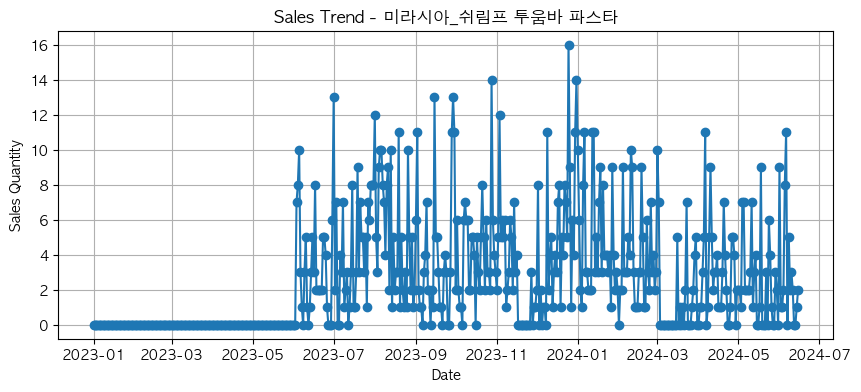


[Menu: 미라시아_스텔라(무제한)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-20 (110일 연속 0)


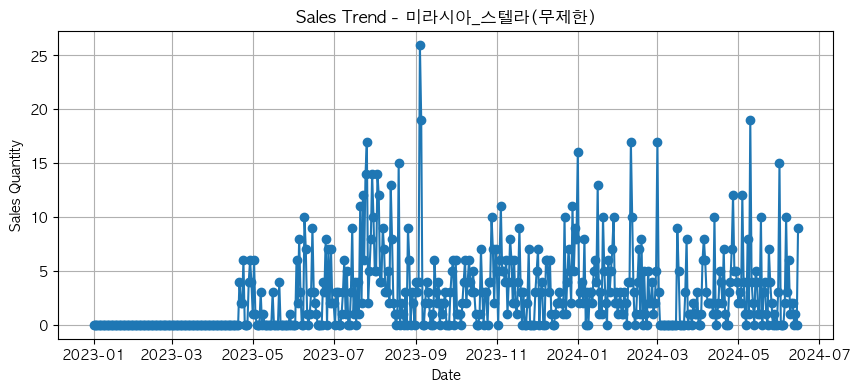


[Menu: 미라시아_스프라이트] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-01 (152일 연속 0)


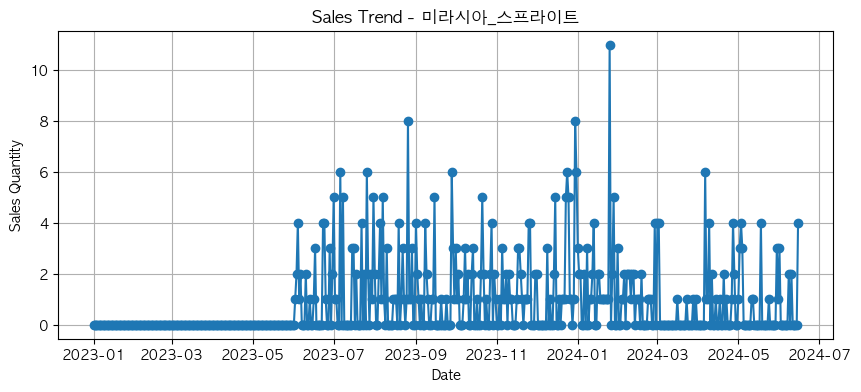


[Menu: 미라시아_유자 하이볼] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-16 (75일 연속 0)


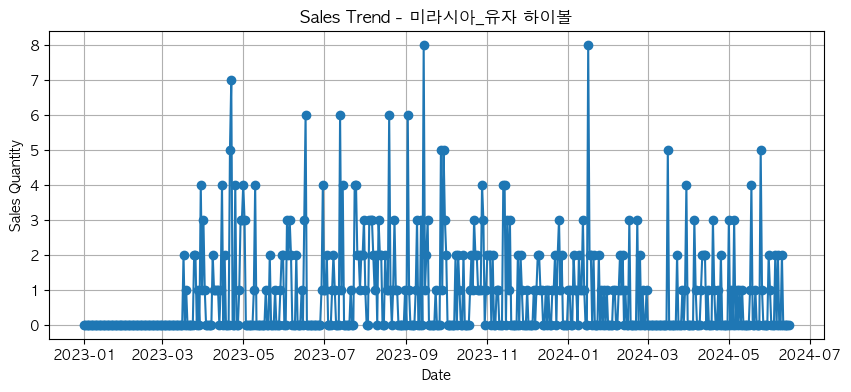


[Menu: 미라시아_잭 애플 토닉] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-08 (251일 연속 0)


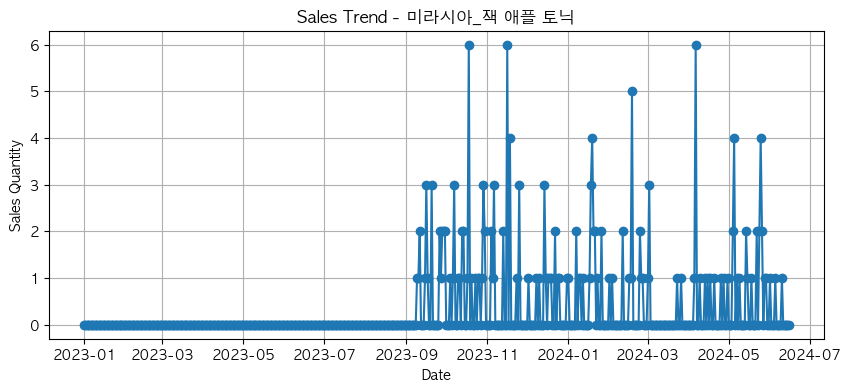


[Menu: 미라시아_칠리 치즈 프라이] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-02 (153일 연속 0)


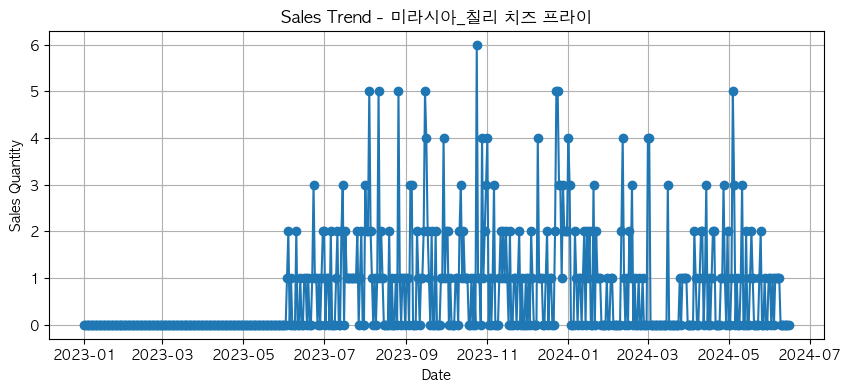


[Menu: 미라시아_코카콜라] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-01 (152일 연속 0)


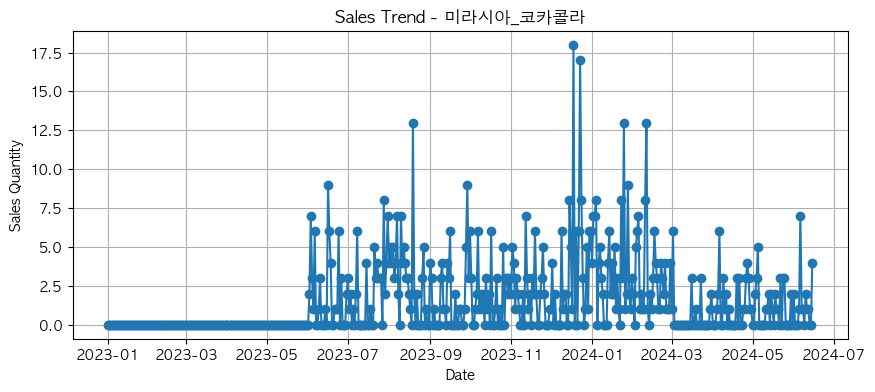


[Menu: 미라시아_코카콜라(제로)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-11 (162일 연속 0)


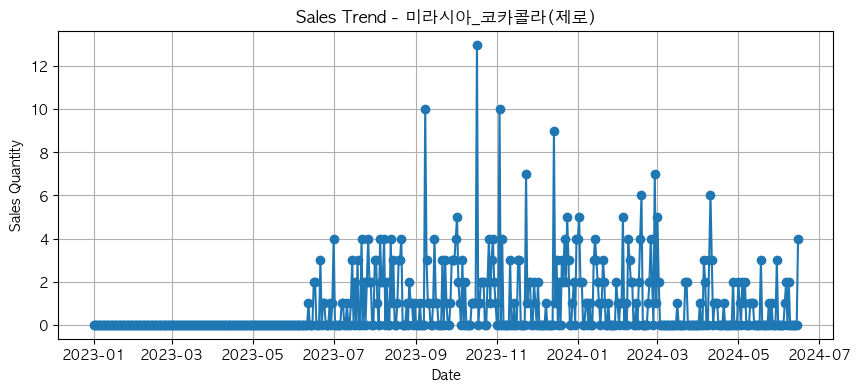


[Menu: 미라시아_콥 샐러드] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-12-07 (341일 연속 0)


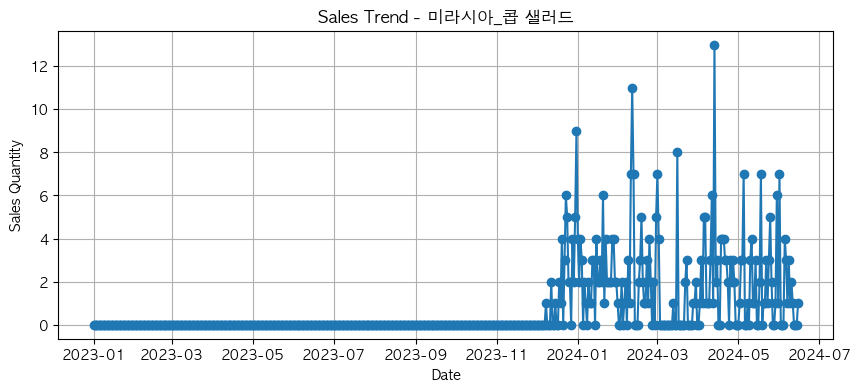


[Menu: 미라시아_파스타면 추가(150g)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-06-02 (153일 연속 0)


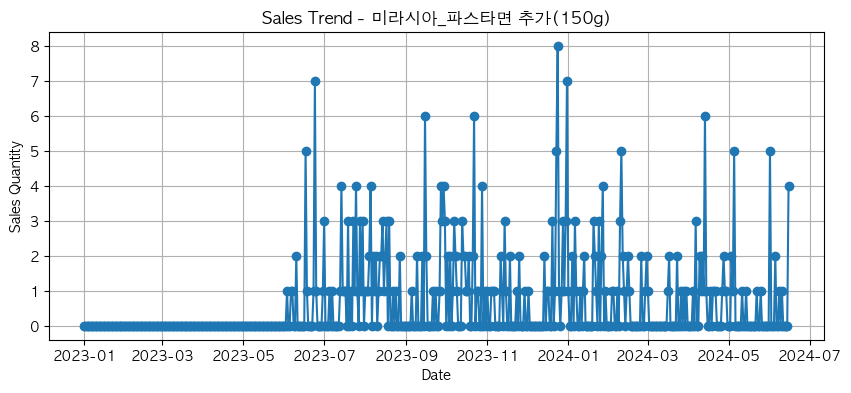


[Menu: 미라시아_핑크레몬에이드] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-16 (75일 연속 0)


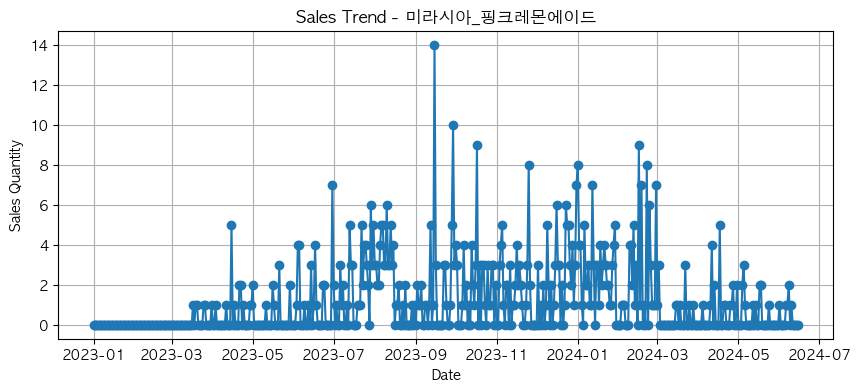


[Menu: 연회장_Cass Beer] 10일 이상 연속 0 구간:
  구간 1: 2023-07-11 ~ 2023-08-17 (38일 연속 0)
  구간 2: 2024-02-24 ~ 2024-03-29 (35일 연속 0)


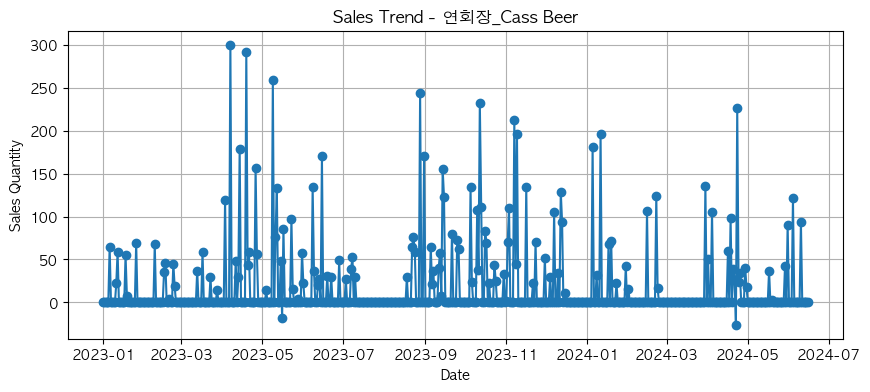


[Menu: 연회장_Conference M8] 10일 이상 연속 0 구간:
  구간 1: 2023-12-23 ~ 2024-01-31 (40일 연속 0)


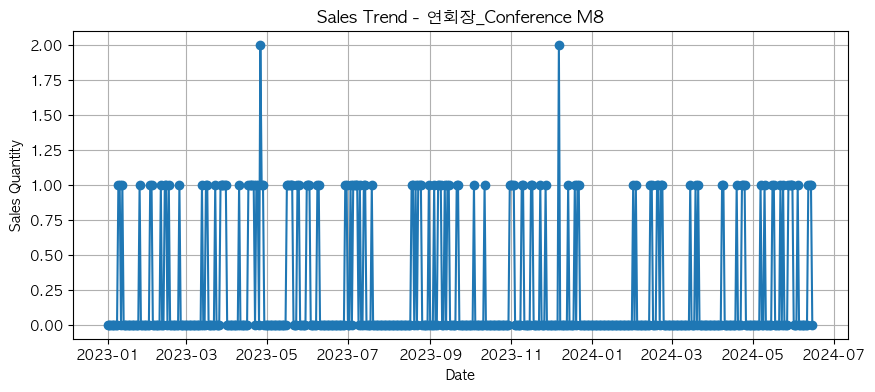


[Menu: 연회장_Regular Coffee] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-02-23 (54일 연속 0)
  구간 2: 2023-07-27 ~ 2023-08-29 (34일 연속 0)


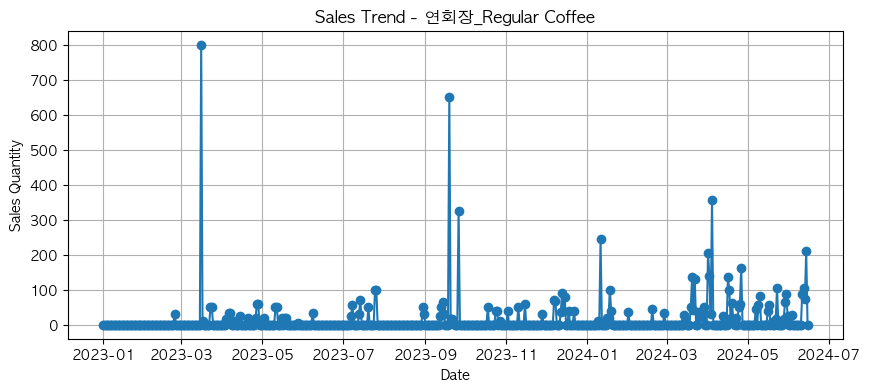


[Menu: 연회장_공깃밥] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-07-20 (201일 연속 0)


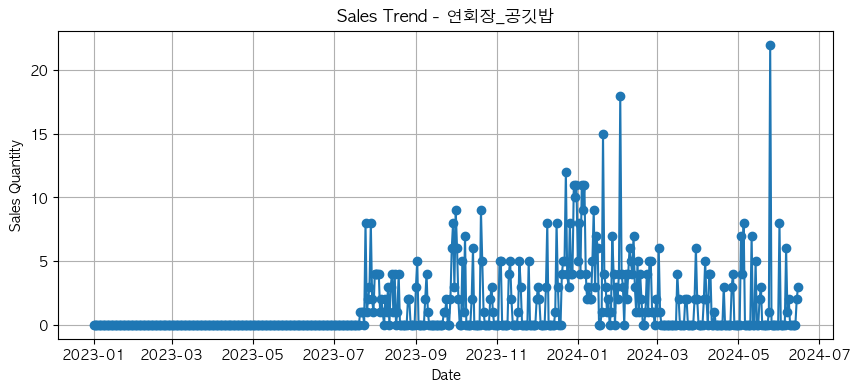


[Menu: 연회장_마라샹궈] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-09-07 (250일 연속 0)


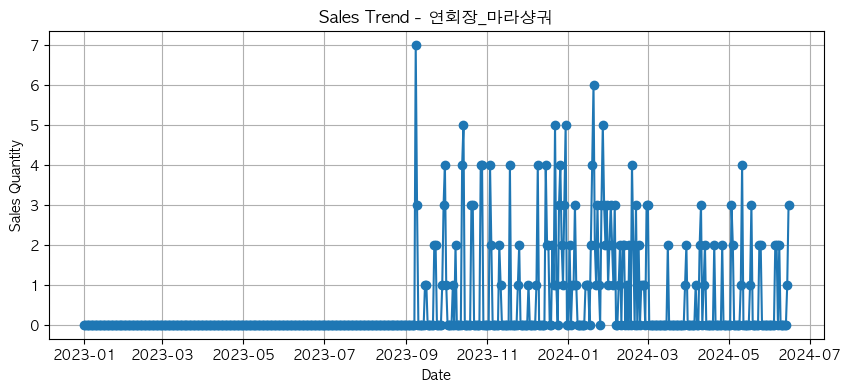


[Menu: 연회장_삼겹살추가 (200g)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-07-20 (201일 연속 0)


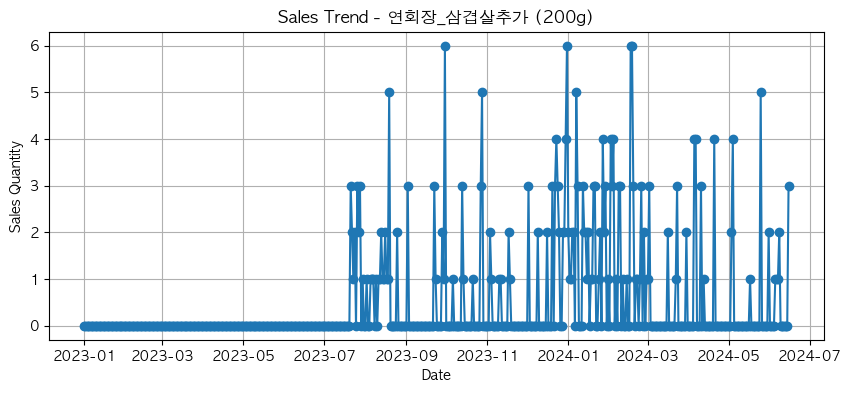


[Menu: 연회장_왕갈비치킨] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-07-21 (202일 연속 0)


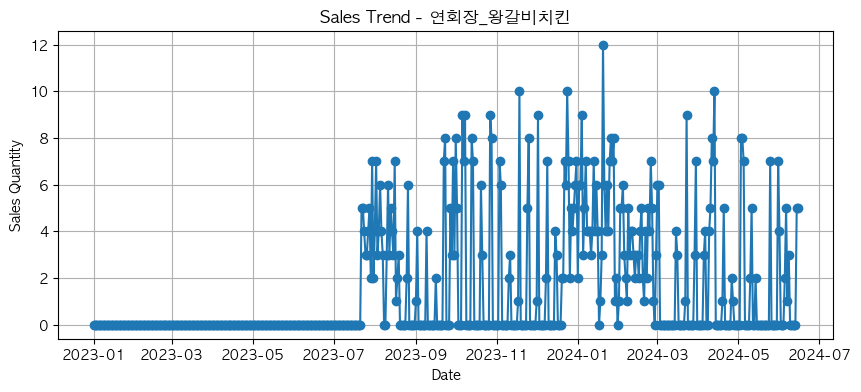


[Menu: 카페테리아_구슬아이스크림] 10일 이상 연속 0 구간:
  구간 1: 2023-04-25 ~ 2023-12-05 (225일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


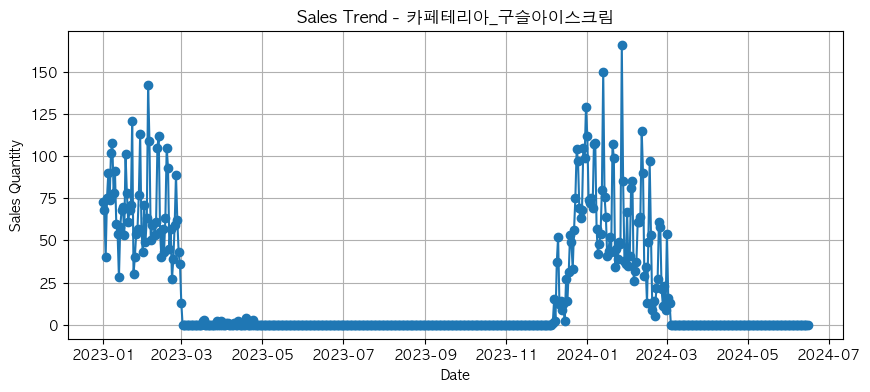


[Menu: 카페테리아_단체식 13000(신)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-17 (107일 연속 0)


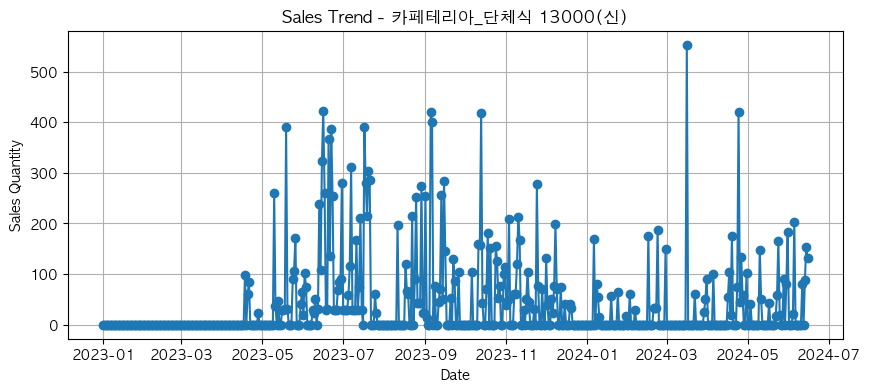


[Menu: 카페테리아_단체식 18000(신)] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-04-04 (94일 연속 0)


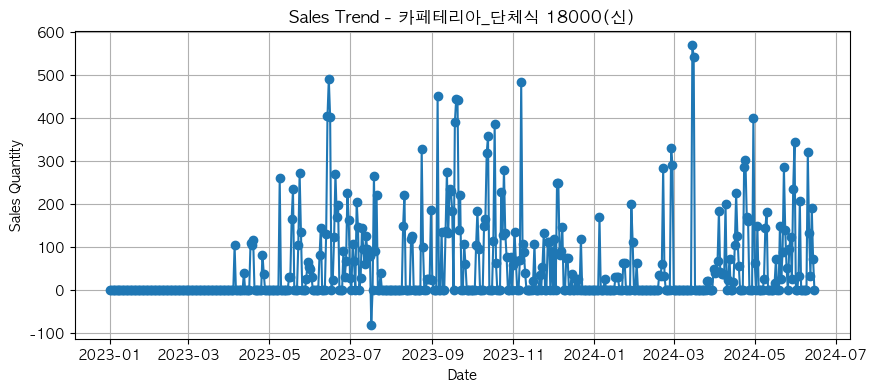


[Menu: 카페테리아_복숭아 아이스티] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-12-06 (280일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


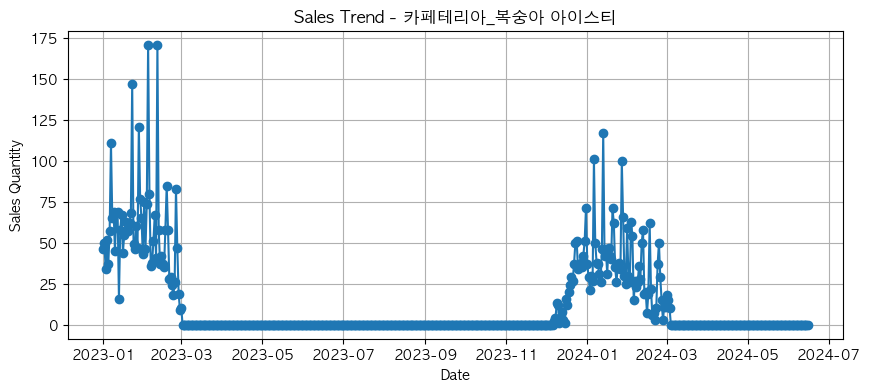


[Menu: 카페테리아_새우튀김 우동] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-12-06 (280일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


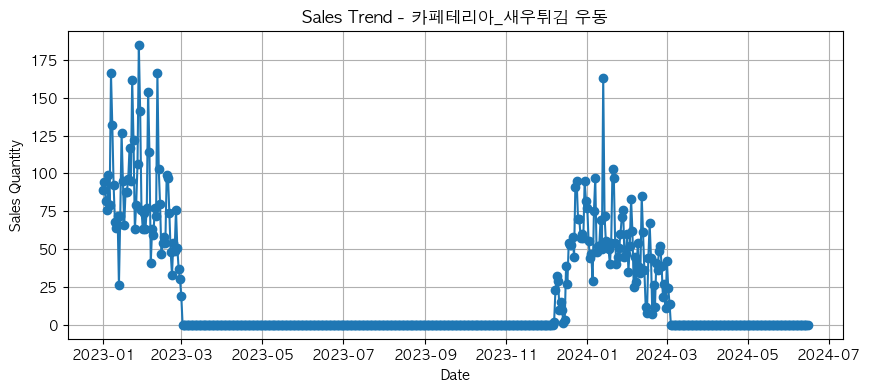


[Menu: 카페테리아_샷 추가] 10일 이상 연속 0 구간:
  구간 1: 2023-03-01 ~ 2023-12-08 (283일 연속 0)
  구간 2: 2024-03-03 ~ 2024-06-15 (105일 연속 0)


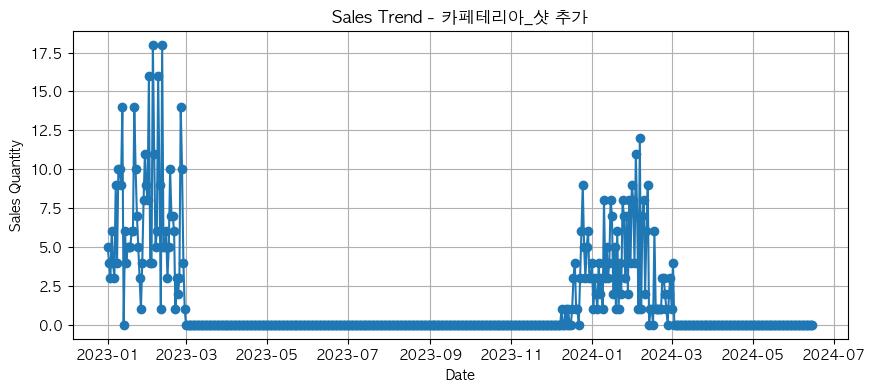


[Menu: 카페테리아_아메리카노(HOT)] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-12-05 (279일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


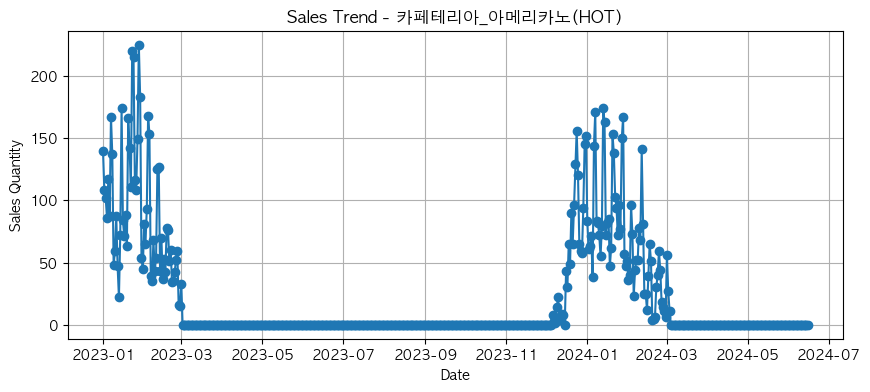


[Menu: 카페테리아_아메리카노(ICE)] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-12-05 (279일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


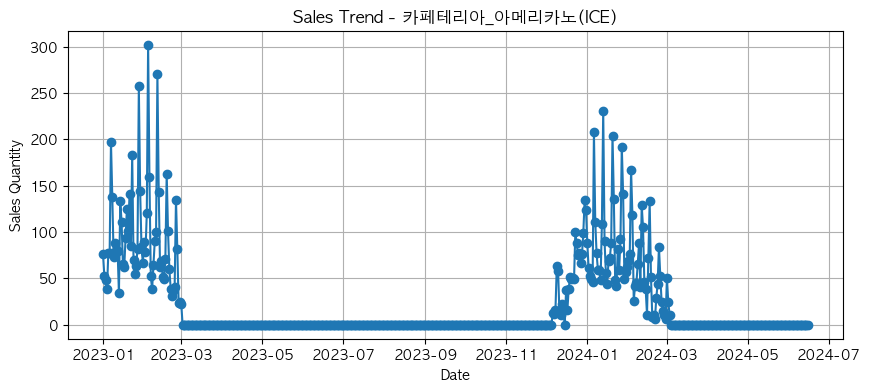


[Menu: 카페테리아_오픈푸드] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-04-27 (57일 연속 0)
  구간 2: 2023-04-29 ~ 2023-06-10 (43일 연속 0)
  구간 3: 2023-07-22 ~ 2023-09-17 (58일 연속 0)
  구간 4: 2024-04-09 ~ 2024-06-15 (68일 연속 0)


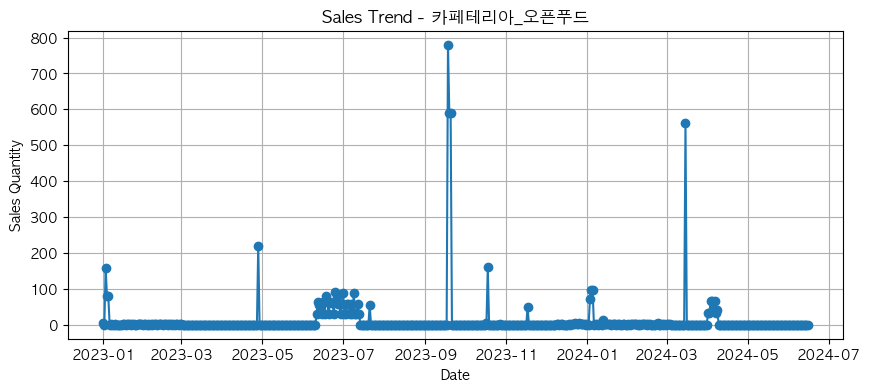


[Menu: 카페테리아_진사골 설렁탕] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-12-05 (339일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


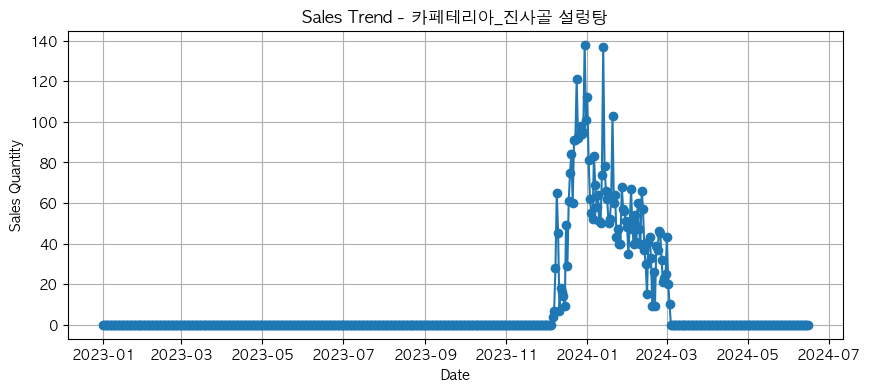


[Menu: 카페테리아_카페라떼(HOT)] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-12-05 (279일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


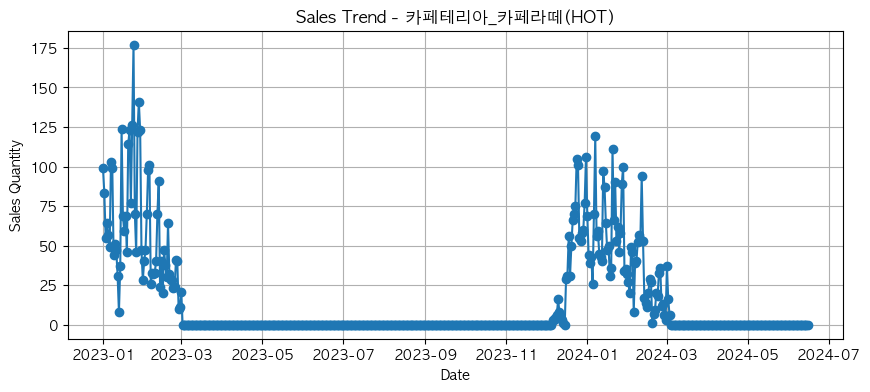


[Menu: 카페테리아_카페라떼(ICE)] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-12-06 (280일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


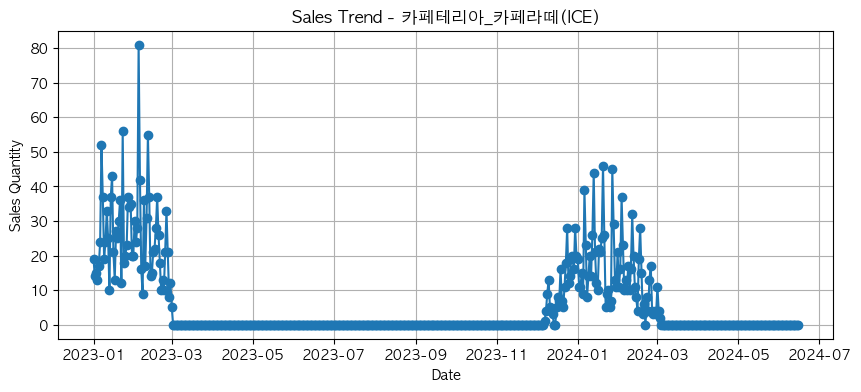


[Menu: 카페테리아_한상 삼겹구이 정식(2인) 소요시간 약 15~20분] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-16 (75일 연속 0)
  구간 2: 2023-12-06 ~ 2024-03-28 (114일 연속 0)


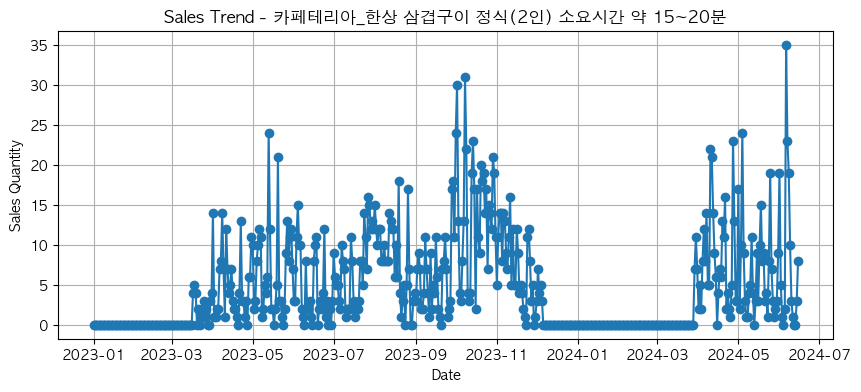


[Menu: 포레스트릿_꼬치어묵] 10일 이상 연속 0 구간:
  구간 1: 2023-06-01 ~ 2023-09-08 (100일 연속 0)


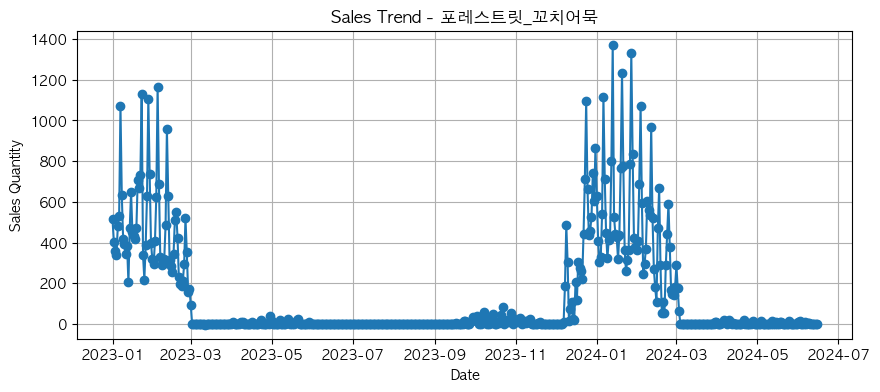


[Menu: 포레스트릿_복숭아 아이스티] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-03-31 (30일 연속 0)
  구간 2: 2024-03-04 ~ 2024-06-15 (104일 연속 0)


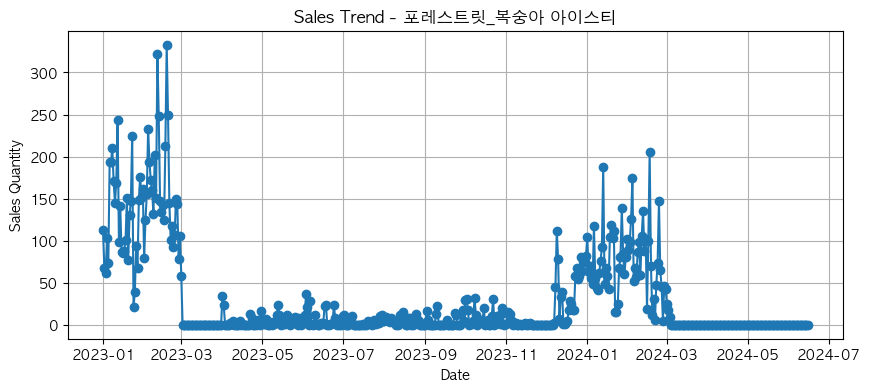


[Menu: 포레스트릿_생수] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-03-31 (30일 연속 0)


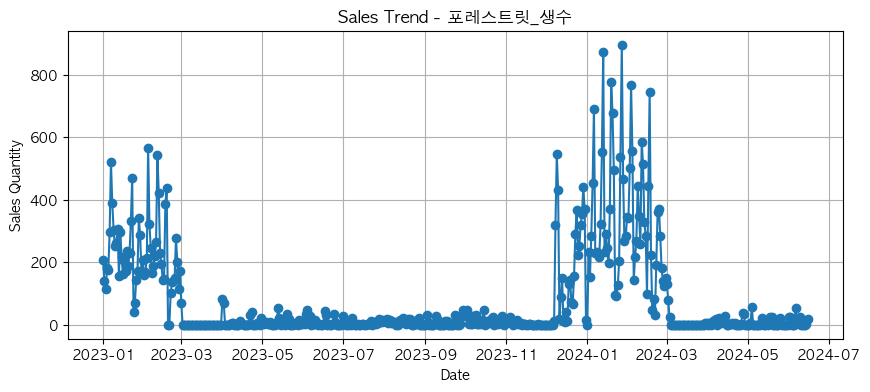


[Menu: 포레스트릿_스프라이트] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-03-31 (30일 연속 0)


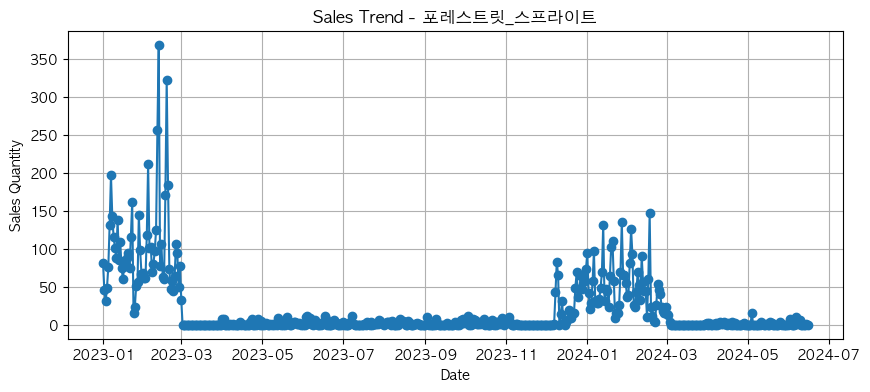


[Menu: 포레스트릿_아메리카노(HOT)] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-03-31 (30일 연속 0)


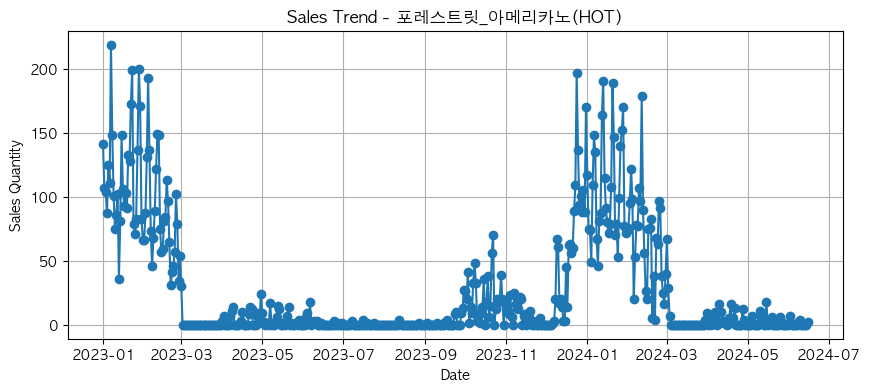


[Menu: 포레스트릿_카페라떼(HOT)] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-03-31 (30일 연속 0)


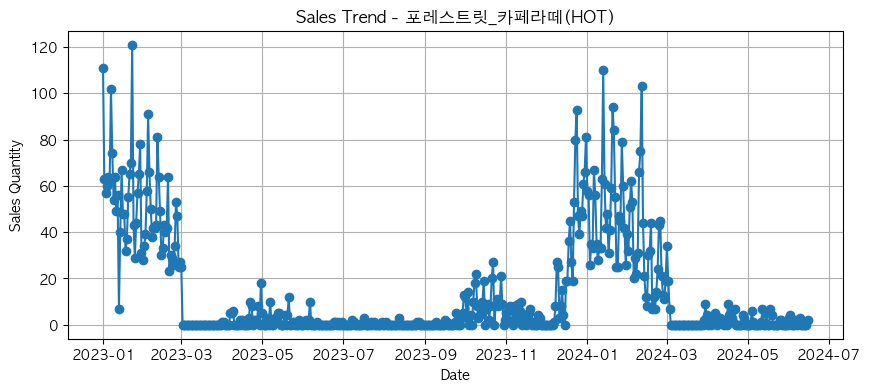


[Menu: 포레스트릿_카페라떼(ICE)] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-03-31 (30일 연속 0)


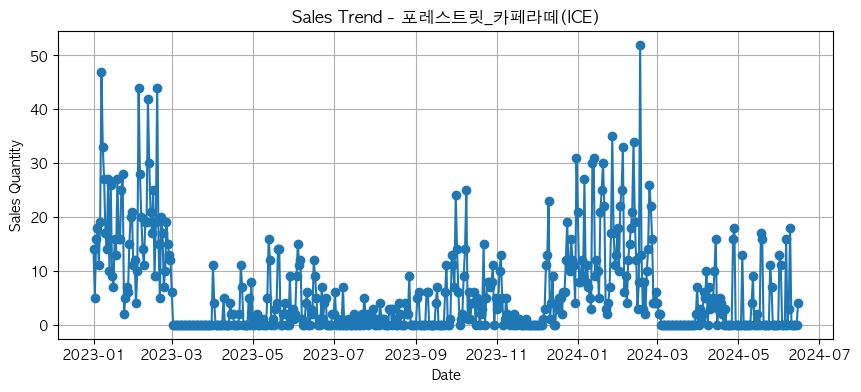


[Menu: 포레스트릿_페스츄리 소시지] 10일 이상 연속 0 구간:
  구간 1: 2023-03-02 ~ 2023-03-31 (30일 연속 0)


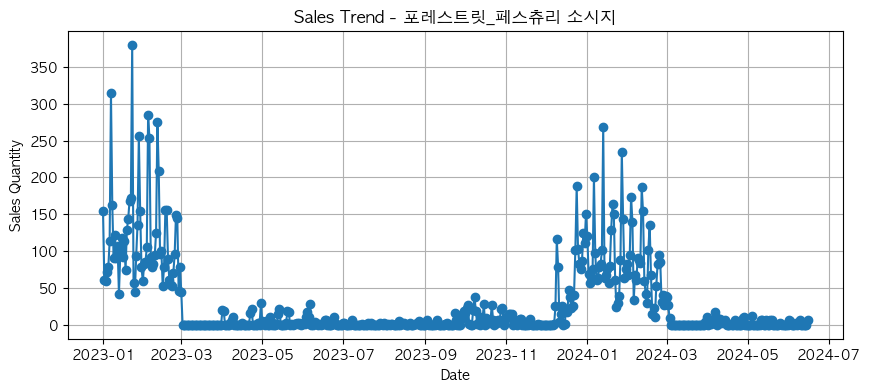


[Menu: 화담숲주막_느린마을 막걸리] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


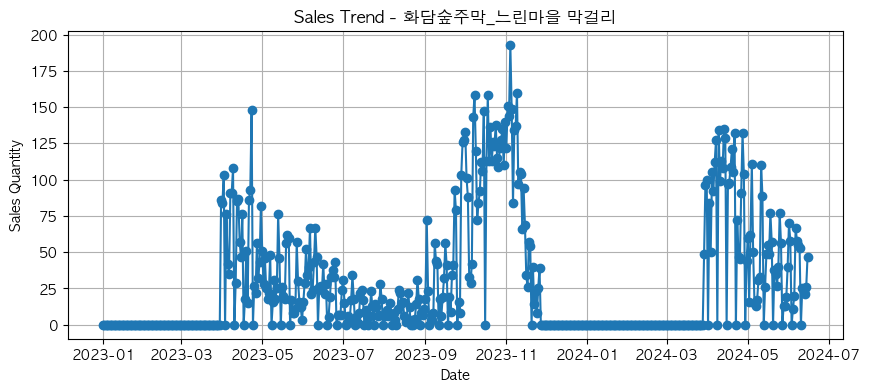


[Menu: 화담숲주막_단호박 식혜 ] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


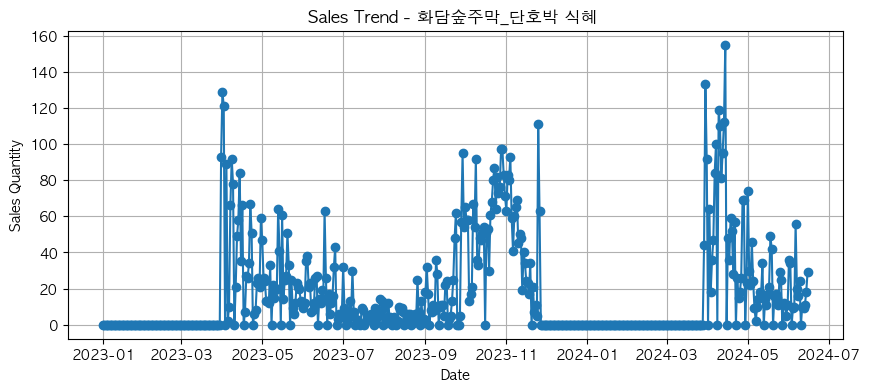


[Menu: 화담숲주막_병천순대] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


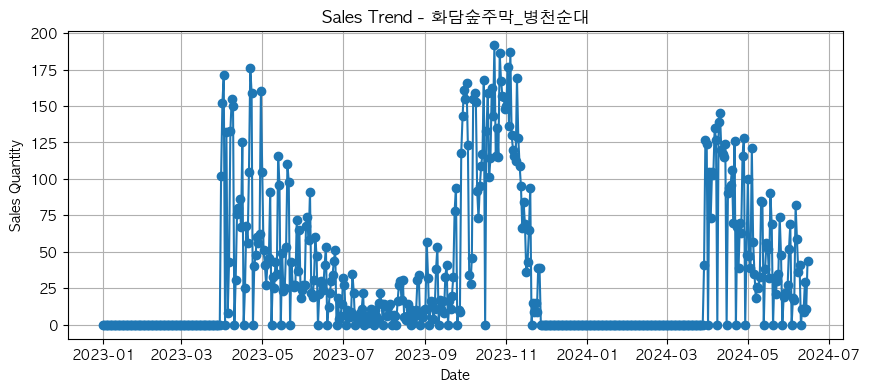


[Menu: 화담숲주막_스프라이트] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


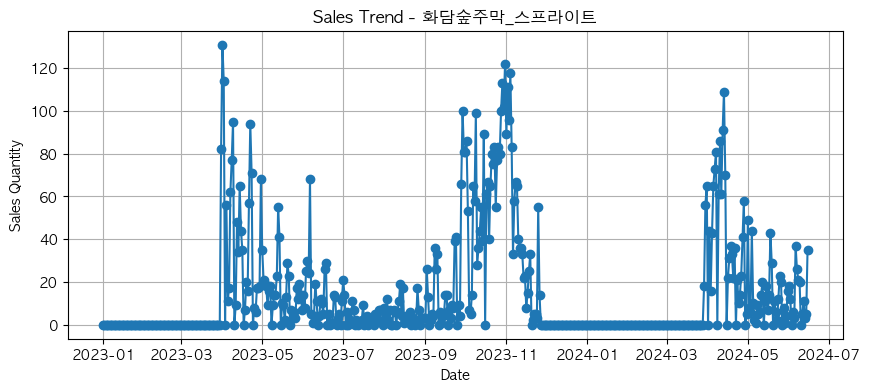


[Menu: 화담숲주막_참살이 막걸리] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


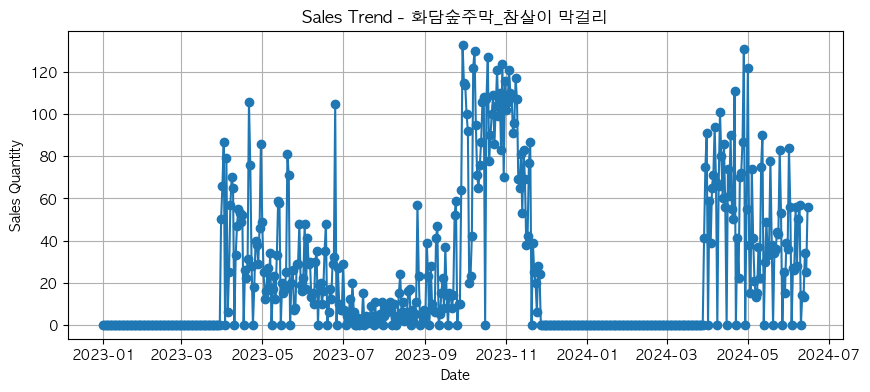


[Menu: 화담숲주막_찹쌀식혜] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


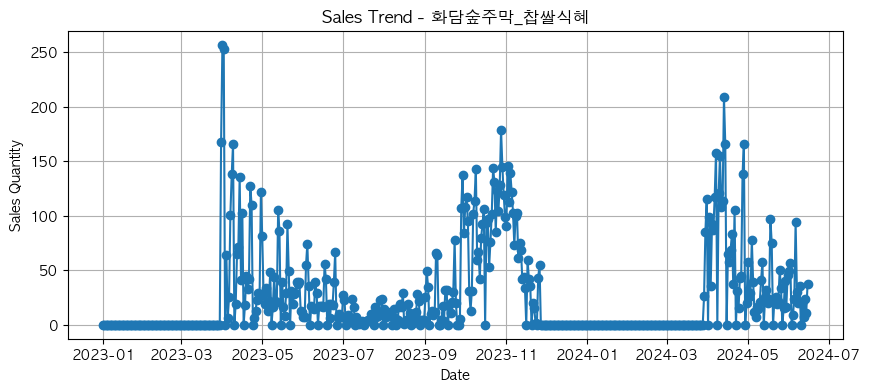


[Menu: 화담숲주막_콜라] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


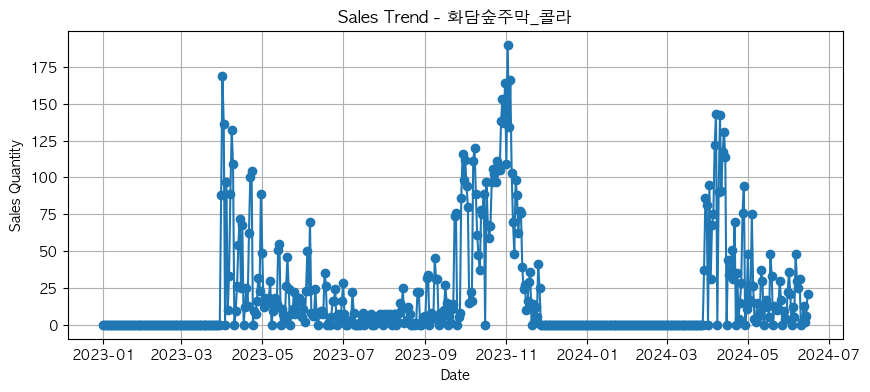


[Menu: 화담숲주막_해물파전] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


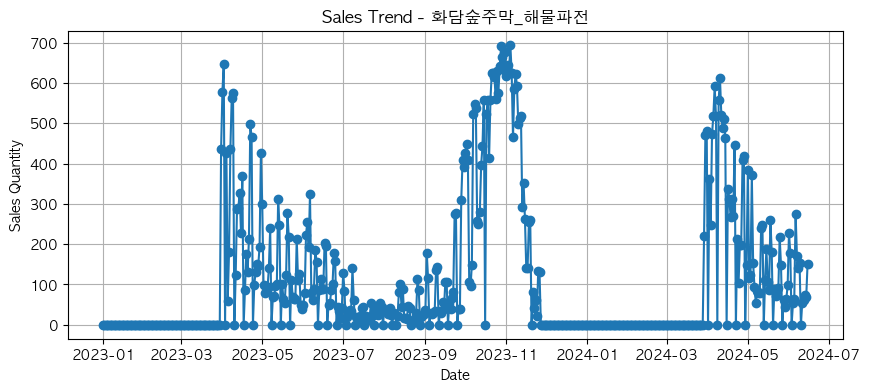


[Menu: 화담숲카페_메밀미숫가루] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


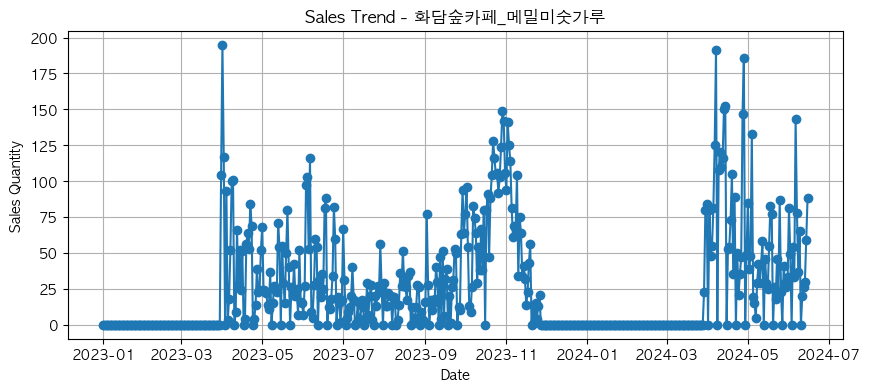


[Menu: 화담숲카페_아메리카노 HOT] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


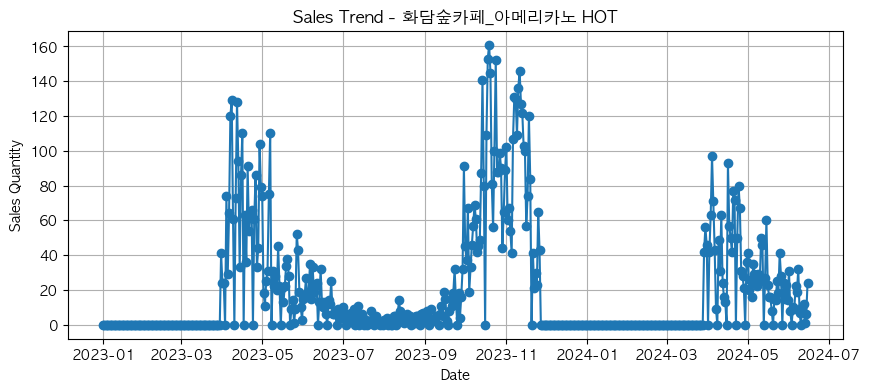


[Menu: 화담숲카페_아메리카노 ICE] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


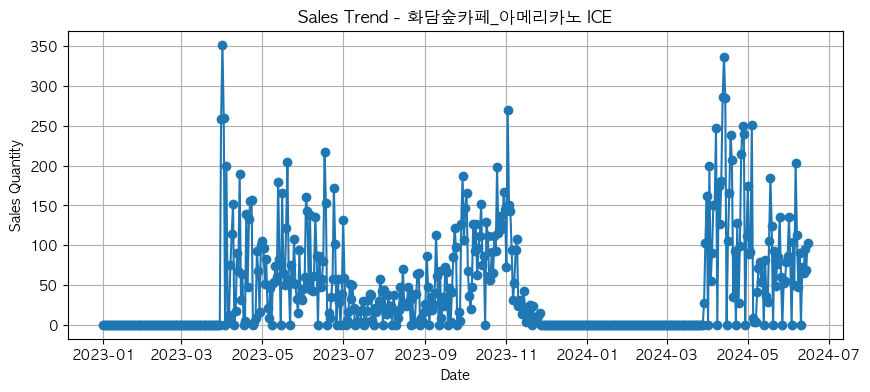


[Menu: 화담숲카페_카페라떼 ICE] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


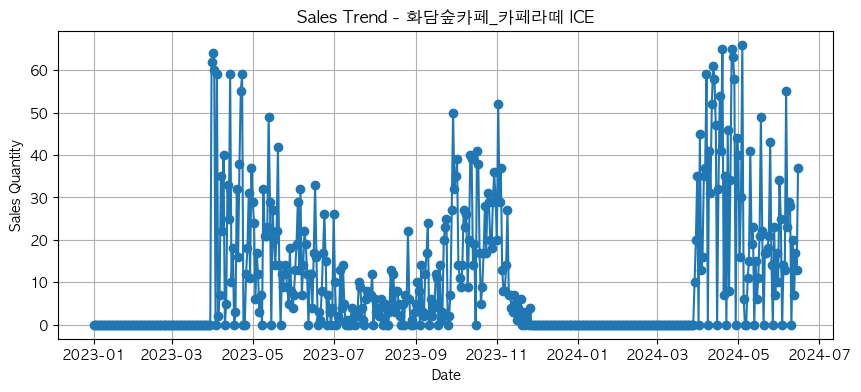


[Menu: 화담숲카페_현미뻥스크림] 10일 이상 연속 0 구간:
  구간 1: 2023-01-01 ~ 2023-03-30 (89일 연속 0)
  구간 2: 2023-11-27 ~ 2024-03-28 (123일 연속 0)


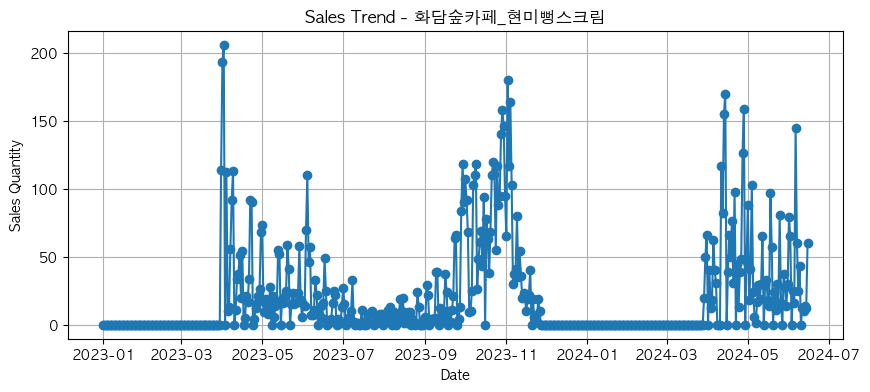

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 한글 폰트 설정 (Mac)
rcParams['font.family'] = 'AppleGothic'

# 마이너스 기호 깨짐 방지
rcParams['axes.unicode_minus'] = False


# ================================
# ① 데이터 로드
# ================================

# './data/test/TEST_00.csv'
file_path = './data/train/train.csv'
df = pd.read_csv(file_path)

# 컬럼명 영어로 변경
df.columns = ['date', 'store_menu', 'sales_qty']

# 날짜 컬럼 datetime 변환
df['date'] = pd.to_datetime(df['date'])

# ================================
# ② 메뉴별 10일 이상 연속 0 판매 구간 탐지 + 시각화
# ================================
threshold = 30 # 연속 0일 최소 조건

for menu, group in df.groupby('store_menu'):
    group = group.sort_values('date').reset_index(drop=True)
    
    zero_mask = (group['sales_qty'] == 0)
    streaks = []
    start_idx = None
    
    # 연속 0일 탐색
    for i, is_zero in enumerate(zero_mask):
        if is_zero and start_idx is None:
            start_idx = i
        elif not is_zero and start_idx is not None:
            streak_length = i - start_idx
            if streak_length >= threshold:  # 10일 이상만 인정
                start_date = pd.to_datetime(group.loc[start_idx, 'date']).strftime('%Y-%m-%d')
                end_date = pd.to_datetime(group.loc[i-1, 'date']).strftime('%Y-%m-%d')
                streaks.append((start_date, end_date, streak_length))
            start_idx = None
    
    # 마지막까지 0일이 이어진 경우
    if start_idx is not None:
        streak_length = len(group) - start_idx
        if streak_length >= threshold:  # 10일 이상만 인정
            start_date = pd.to_datetime(group.loc[start_idx, 'date']).strftime('%Y-%m-%d')
            end_date = pd.to_datetime(group.loc[len(group)-1, 'date']).strftime('%Y-%m-%d')
            streaks.append((start_date, end_date, streak_length))
    
    # ================================
    # ③ 결과 출력 및 시각화
    # ================================
    if streaks:
        print(f"\n[Menu: {menu}] 10일 이상 연속 0 구간:")
        for idx, (start, end, length) in enumerate(streaks, 1):
            print(f"  구간 {idx}: {start} ~ {end} ({length}일 연속 0)")
        
        # 그래프 시각화
        plt.figure(figsize=(10, 4))
        plt.plot(group['date'], group['sales_qty'], marker='o')
        plt.title(f"Sales Trend - {menu}")
        plt.xlabel('Date')
        plt.ylabel('Sales Quantity')
        plt.grid(True)
        plt.show()

